**Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Redes Neuronales y Aprendizaje Profundo**

***
Datos del alumno (Nombre y Apellidos): Jose Manuel Pinillos Rubio

Fecha: 1 de mayo de 2025
***

# <span style="font-size: 20pt; font-weight: bold; color: #0098cd;">Clasificación de dígitos utilizando perceptrones multicapa</span>

## Descripción de la actividad

En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de dígitos del 0 al 9 escritos a mano. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es MNIST, una base de datos constituida por (como no) imágenes de dígitos escritos a mano. Este dataset es ampliamente utilizado en docencia como punto de entrada al entrenamiento de redes neuronales y otros, pero también es muy utilizado en trabajos reales de investigación para el entrenamiento de imágenes. Puedes consultar más información sobre el dataset en [este enlace](https://es.wikipedia.org/wiki/Base_de_datos_MNIST).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados y que son perfectamente visibles en la versión PDF que debes entregar adjunta**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [ ]:
# -------------------- Keras y TensorFlow --------------------
import keras  # Interfaz de alto nivel para construir y entrenar redes neuronales
from keras.datasets.mnist import load_data  # Carga directa del dataset MNIST

from keras.models import Sequential  # Permite definir un modelo como una secuencia de capas
from keras.layers import Dense, Flatten, Dropout, LeakyReLU  # Capas densas, de aplanamiento, regularización y activación avanzada
from tensorflow.keras import Input  # Capa explícita de entrada para modelos secuenciales

import tensorflow as tf  # Framework de aprendizaje profundo sobre el que se ejecuta Keras
from tensorflow.keras.optimizers import Adam  # Optimizador Adam para entrenamiento
from keras.optimizers import SGD, Adagrad, RMSprop  # Otros optimizadores disponibles para comparación

from tensorflow.keras.callbacks import EarlyStopping  # Detención temprana para evitar sobreentrenamiento
from keras.callbacks import Callback  # Clase base para crear callbacks personalizados
from keras.regularizers import l2, l1_l2  # Regularizadores L2 y combinación L1_L2 para evitar sobreajuste

# -------------------- Utilidades --------------------
import matplotlib.pyplot as plt  # Biblioteca para visualización de datos y gráficos
import numpy as np  # Biblioteca para operaciones numéricas con arrays
import pandas as pd  # Biblioteca para manipulación y análisis de datos tabulares

# -------------------- Semillas para reproducibilidad --------------------
import os
import random

seed_value = 13

os.environ['PYTHONHASHSEED'] = str(seed_value)  # Asegura consistencia en operaciones internas de Python
random.seed(seed_value)                         # Fijamos la semilla para el generador aleatorio de Python
np.random.seed(seed_value)                      # Fijamos la semilla para NumPy
tf.random.set_seed(seed_value)                  # Fijamos la semilla para TensorFlow

En este bloque se importan las bibliotecas necesarias para desarrollar la actividad: `Keras` y `TensorFlow` para construir y entrenar la red neuronal, `matplotlib` para visualizar imágenes, y `NumPy` y `pandas` para operaciones numéricas y análisis de datos. Además, se fijan las semillas aleatorias de `NumPy` y `TensorFlow` para mejorar la reproducibilidad de los resultados. Esto es necesario porque las redes neuronales incluyen procesos aleatorios internos, como la inicialización de pesos o la partición de validación, que no permiten especificar una semilla local como en otros algoritmos tradicionales. Por este motivo, las semillas deben establecerse de forma global antes de ejecutar cualquier operación. No obstante, al trabajar en entornos como Google Colab (mi caso) con aceleración por GPU, pueden mantenerse pequeñas variaciones entre ejecuciones, ya que algunas operaciones paralelizadas no son completamente deterministas.

Tenemos la suerte de que el dataset MNIST, el que vamos a utilizar en esta actividad, está guardado en Keras, por lo que podemos utilizarlo sin necesidad de buscar el dataset de forma externa.

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen los dígitos y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [ ]:
(training_images, training_labels), (test_images, test_labels) = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

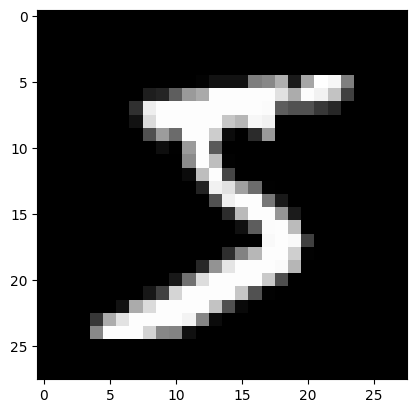

In [ ]:
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro

print(training_labels[0])
print(training_images[0])

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

### Pregunta 1.1

¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

El conjunto de datos está compuesto por **60.000 imágenes de entrenamiento** y **10.000 imágenes de prueba**, sumando un total de **70.000 imágenes**, cada una con un tamaño de **28x28 píxeles**. Esta información puede consultarse en la [descripción del dataset](https://es.wikipedia.org/wiki/Base_de_datos_MNIST), donde se detallan sus características principales.

No obstante, si no se dispusiera de dicha documentación, es posible obtener estos datos directamente mediante código en Python:

In [ ]:
# Obtenemos el número total de imágenes en el conjunto de entrenamiento
n_images_training = training_images.shape[0]

# Obtenemos el número total de imágenes en el conjunto de prueba
n_images_test = test_images.shape[0]

# Obtenemos el tamaño (alto x ancho) de una imagen
image_shape = training_images[0].shape

# Mostramos los resultados
print(f"Tenemos un total de {n_images_training} imágenes de entrenamiento y {n_images_test} imágenes de test, lo que hace un total de {n_images_training + n_images_test} imágenes.")
print(f"Cada imagen tiene un tamaño de {image_shape[0]}x{image_shape[1]} píxeles.")

Tenemos un total de 60000 imágenes de entrenamiento y 10000 imágenes de test, lo que hace un total de 70000 imágenes.
Cada imagen tiene un tamaño de 28x28 píxeles.


Este fragmento de código permite calcular y mostrar cuántas imágenes hay en los conjuntos de entrenamiento y prueba del *dataset*, así como el tamaño de cada imagen.

En primer lugar, se accede al atributo `shape` del array `training_images`, que devuelve una tupla con las dimensiones del conjunto: el número de imágenes, la altura y la anchura. El valor en la posición `[0]` representa la cantidad total de imágenes de entrenamiento, mientras que `test_images.shape[0]` indica cuántas hay en el conjunto de prueba.

Para conocer el tamaño de cada imagen, se accede directamente al primer elemento del conjunto (`training_images[0]`) y se evalúa su atributo `shape`, que devuelve una tupla con las dimensiones en píxeles (altura y anchura). Esta operación es válida porque todas las imágenes tienen la misma resolución.

Por último, se imprime un mensaje formateado mediante *f-strings* que resume el número de imágenes en cada conjunto, el total general y el tamaño de cada imagen. De este modo, el código ofrece una manera sencilla y clara de verificar el tamaño del dataset sin necesidad de consultar documentación externa.

### Pregunta 1.2

Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en $y$.

#### 1.2.1 `training_images`

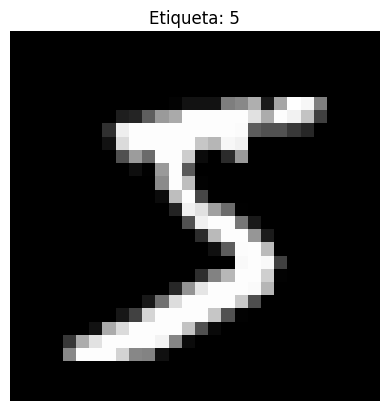

Dimensiones de la imagen: (28, 28)
Valor mínimo en la imagen: 0
Valor máximo en la imagen: 255


In [ ]:
# Visualizamos la primera imagen del dataset de entrenamiento
plt.imshow(training_images[0], cmap="gray")
plt.title(f"Etiqueta: {training_labels[0]}")
plt.axis("off")
plt.show()

# Mostramos el tamaño de la imagen
print("Dimensiones de la imagen:", training_images[0].shape)

# Mostramos los valores mínimo y máximo de la imagen
print("Valor mínimo en la imagen:", training_images[0].min())
print("Valor máximo en la imagen:", training_images[0].max())

El código explora en detalle el contenido de un ejemplo del dataset. En primer lugar, se utiliza `imshow()` de la biblioteca `matplotlib` para representar visualmente la primera imagen del conjunto de entrenamiento (`training_images[0]`). La opción `cmap="gray"` indica que se debe utilizar una escala de grises, adecuada para imágenes donde cada píxel representa una intensidad luminosa. El título de la imagen se establece con la etiqueta correspondiente (`training_labels[0]`), lo que permite comprobar visualmente si el contenido de la imagen coincide con la categoría indicada. La función `axis("off")` oculta los ejes para mejorar la visualización, y `show()` muestra la imagen renderizada.

A continuación, se muestra el tamaño de la imagen mediante `shape`, lo que permite verificar que cada ejemplo del dataset es una matriz de **28x28** píxeles. Esto indica que cada imagen está compuesta por 784 valores individuales que codifican la información visual del dígito.

Por último, se examinan los valores mínimo y máximo de la matriz utilizando los métodos `.min()` y `.max()` aplicados directamente sobre el array de la imagen. Esta comprobación permite identificar el rango de intensidades de los píxeles, que en este caso va de **0 a 255**. En esta escala, el valor 0 representa el negro absoluto, el 255 el blanco absoluto y los valores intermedios distintos niveles de gris que, en conjunto, forman la imagen del dígito manuscrito.

#### 1.2.2 `training_labels`

In [ ]:
# Mostramos la primera etiqueta
print("Etiqueta asociada a la primera imagen:", training_labels[0])

# Mostramos el valor mínimo y máximo de las etiquetas
print("Valor mínimo en las etiquetas:", np.min(training_labels))
print("Valor máximo en las etiquetas:", np.max(training_labels))

Etiqueta asociada a la primera imagen: 5
Valor mínimo en las etiquetas: 0
Valor máximo en las etiquetas: 9


Este fragmento de código permite explorar el contenido de la variable que almacena las etiquetas del conjunto de entrenamiento (`training_labels`). En primer lugar, se imprime el valor de la primera etiqueta, que ya se había mostrado en el título de la imagen representada anteriormente. Esta etiqueta indica el dígito manuscrito al que corresponde la imagen situada en la misma posición dentro del array de entrenamiento.

A continuación, se aplican los métodos `.min()` y `.max()` para obtener el valor mínimo y el máximo presentes en el conjunto completo de etiquetas. Esta comprobación permite confirmar que **todas las clases están comprendidas entre 0 y 9**, lo cual es coherente con la estructura del dataset MNIST.

#### 1.2.3 Conclusiones

Cada ejemplo del dataset está compuesto por una imagen en escala de grises de 28x28 píxeles, que representa un dígito manuscrito, y una etiqueta numérica asociada que indica el valor del dígito mostrado. La exploración realizada ha permitido comprobar que las imágenes contienen valores de intensidad entre 0 y 255, y que las etiquetas abarcan los diez dígitos posibles, de 0 a 9, lo que confirma que el conjunto de datos es adecuado para una tarea de clasificación multiclase.

## 2. Normalización y preprocesado de los datos

### Pregunta 2.1

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. ¿Cómo lo podemos hacer?

A priori, podría parecer que aplicar un `MinMaxScaler` sería suficiente para normalizar los datos al rango [0, 1]. Sin embargo, este enfoque no es tan directo cuando se trabaja con imágenes representadas como matrices, ya que `MinMaxScaler` interpreta la estructura 2D como un conjunto de filas independientes y aplica la normalización de manera separada a cada una de ellas. Esto altera las proporciones globales de intensidad en la imagen y modifica su distribución original, lo que puede afectar negativamente al entrenamiento de una red neuronal.

Si se deseara utilizar `MinMaxScaler` sin perder la coherencia de las intensidades relativas entre píxeles, sería necesario seguir estos pasos:

1. **Aplanar la imagen**: convertir la matriz de tamaño (28, 28) en un vector columna con forma (784, 1), de modo que todos los píxeles sean tratados como un único conjunto de datos.
2. **Aplicar `MinMaxScaler`** sobre ese vector, de forma que la normalización se realizase considerando el valor mínimo y máximo global de toda la imagen.
3. **Restaurar la forma original**: transformar nuevamente el vector normalizado a una matriz de (28, 28) para conservar la estructura espacial de la imagen.

Este procedimiento garantizaría una normalización correcta, pero resulta más complejo y menos eficiente, especialmente cuando se trabaja con grandes volúmenes de imágenes.

Una forma más sencilla, eficiente y estandarizada en el contexto del *deep learning* es **dividir directamente cada valor de píxel entre 255**, ya que se conoce de antemano que los valores están en el rango [0, 255]. Este método no requiere modificar la forma de los datos, conserva las proporciones originales entre intensidades y es totalmente compatible con las redes neuronales implementadas en Keras y TensorFlow.

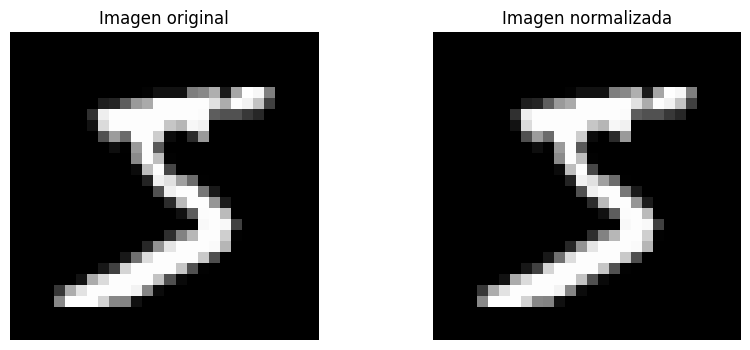

Valor mínimo tras división: 0.0
Valor máximo tras división: 1.0


In [ ]:
# Normalizamos de los datos escalando cada valor de píxel al rango [0, 1]
norm_training_images = training_images / 255.0
norm_test_images = test_images / 255.0

# Mostramos la imagen original y la normalizada
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(training_images[0], cmap="gray")
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(norm_training_images[0], cmap="gray")
plt.title("Imagen normalizada")
plt.axis("off")

plt.show()

# Mostramos el rango de valores tras la normalización
print("Valor mínimo tras división:", norm_training_images.min())
print("Valor máximo tras división:", norm_training_images.max())

Este fragmento de código realiza la normalización de los datos, transformando los valores de los píxeles del rango original [0, 255] al rango [0, 1]. Para ello, se divide cada valor del conjunto de entrenamiento y de test entre 255.0, almacenando los resultados en las variables `norm_training_images` y `norm_test_images`. De este modo, se conserva la estructura original de los datos sin sobrescribir las variables iniciales, lo que permite mantener una referencia directa a las imágenes sin normalizar si fuera necesario.

A continuación, se comparan visualmente la imagen original y la imagen normalizada utilizando `matplotlib`. Se representan en una figura de dos columnas, con títulos diferenciados para facilitar su identificación. Aunque visualmente ambas imágenes puedan parecer iguales, los valores internos han sido escalados, lo cual se confirma mediante la impresión de los valores mínimo y máximo presentes en el conjunto normalizado. El resultado muestra que los valores ahora se encuentran efectivamente en el intervalo [0, 1], lo que garantiza que el preprocesamiento ha sido aplicado correctamente.

### Pregunta 2.2

Utiliza la función ***reshape*** de Numpy para convertir las imágenes en vectores de características de un tamaño de (N, 784). Explica con tus palabras por qué es necesario hacer esto.



En esta etapa, es necesario preparar los datos para que puedan ser procesados por una [red neuronal totalmente conectada (*fully connected*)](https://jacar.es/la-red-neuronal-totalmente-conectada-un-enfoque-innovador-en-el-aprendizaje-automatico/). Este tipo de arquitectura no trabaja con matrices bidimensionales, sino con vectores unidimensionales donde cada elemento representa una característica de entrada. Por tanto, para poder utilizar estas imágenes como entradas del modelo, debemos **convertir cada imagen 28x28 en un vector de 784 elementos**.

La función `reshape` de NumPy permite realizar esta transformación sin alterar los valores del array original. Específicamente, se cambia la forma del conjunto de imágenes de `(N, 28, 28)` a `(N, 784)`, donde `N` es el número total de imágenes. Esta operación reorganiza los datos internos para que cada imagen, antes representada como una matriz de píxeles, pase a estar representada como un vector plano con la misma información.

No obstante, cuando se construye el modelo en Keras, existe una capa llamada `Flatten` que cumple esta misma función de forma automática. Al incluir `Flatten(input_shape=(28, 28))` como primera capa del modelo, se encarga internamente de aplanar cada imagen al formato requerido, evitando así la necesidad de aplicar `reshape` manualmente sobre los datos antes del entrenamiento. De este modo, se preserva la estructura original del dataset y se simplifica el flujo de preprocesamiento.

Por motivos didácticos, en esta actividad utilizaremos `reshape` para observar cómo se realiza el aplanamiento de forma manual y comprender mejor el formato que requieren las capas densas cuando no se emplea `Flatten` dentro del modelo.

In [ ]:
vector_training = norm_training_images.reshape(norm_training_images.shape[0], 784)
vector_test = norm_test_images.reshape(norm_test_images.shape[0], 784)

En este fragmento de código se aplica el método `reshape` de NumPy para reorganizar la forma de los arrays `norm_training_images` y `norm_test_images`. Ambos tienen inicialmente una estructura tridimensional de la forma `(N, 28, 28)`, donde `N` representa el número de imágenes. Al aplicar `reshape(norm_training_images.shape[0], 784)`, se transforma cada imagen en un vector unidimensional de 784 elementos, resultando en un nuevo array de forma `(N, 784)`. Esta operación no modifica los valores internos, únicamente cambia su disposición para adaptarlos al formato que espera la red neuronal.

### Pregunta 2.3

Para facilitar el desarrollo de la actividad, vamos a expresar las etiquetas así:

In [ ]:
training_labels_onehot = tf.keras.utils.to_categorical(training_labels)
test_labels_onehot = tf.keras.utils.to_categorical(test_labels)

Este fragmento de código transforma las etiquetas de entrenamiento y de test mediante la función `to_categorical()` de Keras. Originalmente, las etiquetas son valores enteros entre 0 y 9 que indican la clase a la que pertenece cada imagen. La función `to_categorical()` convierte estos valores en vectores **one-hot**, es decir, vectores de longitud 10 donde la posición correspondiente a la clase tiene un 1 y el resto son ceros.

Por ejemplo, una etiqueta con valor 3 se transforma en el vector `[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]`. Este formato permite representar explícitamente cada clase como un vector binario con una única posición activada.

Muestra cómo son ahora los datos, como resultado de este cambio y también de los realizados en las dos preguntas anteriores. Debate cómo se beneficiará la red neuronal de todos estos cambios.

Tras los cambios realizados en los pasos anteriores, los datos han pasado por tres transformaciones fundamentales:

1. **Normalización de las imágenes**: Las imágenes originales contenían valores enteros entre 0 y 255. Tras dividir cada píxel por 255, ahora todas las intensidades están en el rango `[0, 1]`.


In [ ]:
print(f"Rango de valores originales: [{training_images.min()}, {training_images.max()}]")
print(f"Rango de valores normalizados: [{norm_training_images.min()}, {norm_training_images.max()}]")

Rango de valores originales: [0, 255]
Rango de valores normalizados: [0.0, 1.0]


2. **Reestructuración de las imágenes a vectores**: Cada imagen, originalmente de tamaño 28x28, ha sido convertida en un vector de 784 elementos mediante `reshape`.

In [ ]:
print("Forma del conjunto de entrenamiento:", vector_training.shape)
print("Forma del conjunto de test:", vector_test.shape)

Forma del conjunto de entrenamiento: (60000, 784)
Forma del conjunto de test: (10000, 784)


3. **Codificación one-hot de las etiquetas**: Las etiquetas, que antes eran números enteros (por ejemplo, `3`), ahora son vectores de 10 posiciones con una única posición activada.

In [ ]:
print(f"Etiqueta original: {training_labels[0]}")
print(f"Etiqueta codificada: {training_labels_onehot[0]}")
print("Forma de las etiquetas originales:", training_labels.shape)
print("Forma de las etiquetas codificadas:", training_labels_onehot.shape)

Etiqueta original: 5
Etiqueta codificada: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Forma de las etiquetas originales: (60000,)
Forma de las etiquetas codificadas: (60000, 10)


Estas tres transformaciones preparan los datos para que puedan ser procesados correctamente y de forma eficiente por una red neuronal:

- La **normalización** garantiza que los valores de entrada estén en un rango homogéneo, acelerando así el aprendizaje y evitando problemas de desajuste entre escalas.
- El **aplanamiento** de las imágenes permite alimentar correctamente las capas densas, que no pueden operar con estructuras bidimensionales.
- La **codificación one-hot** de las etiquetas es necesaria porque se trata de una clasificación multiclase y se utilizará una capa de salida `softmax`.

## 3. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
- **`Sequential`**: Eso define una SECUENCIA de capas en la red neuronal
- **`Dense`**: Añade una capa de neuronas
- **`Flatten`**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
- **Relu** significa que:$$ f(x) = \left\{\begin{matrix} {x} & {si\ x > 0} \\ {0} & {si\ x \leq 0}  \end{matrix}\right.
$$

  Lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.

- **`Softmax`** toma un conjunto de valores, y escoge el más grande.

### Pregunta 3.1

Utilizando Keras, y preparando los datos de X e Y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de MNIST con las siguientes características:

* Una capa de entrada del tamaño adecuado.
* Una capa oculta de 512 neuronas.
* Una capa final con 10 salidas.

In [ ]:
# Definimos el modelo como una secuencia de capas
model = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model.add(Flatten())

# Añadimos una capa oculta densa con 512 neuronas y activación ReLU
model.add(Dense(512, activation="relu"))

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax
model.add(Dense(10, activation="softmax"))

Este bloque de código define la arquitectura de una red neuronal secuencial compuesta por tres capas. En primer lugar, se utiliza la capa `Flatten` para transformar las imágenes de entrada de tamaño `(28, 28)` en vectores de 784 elementos.

A continuación, se añade una capa oculta `Dense` con 512 neuronas y función de activación `relu`. Esta función permite introducir no linealidad en el modelo, ya que solo transmite los valores positivos y anula los negativos.

Por último, se incorpora una capa de salida `Dense` con 10 neuronas, correspondiente al número de clases del problema (dígitos del 0 al 9), utilizando la activación `softmax`. Esta función convierte la salida en un vector de probabilidades, donde cada valor representa la probabilidad de que la imagen pertenezca a una clase concreta. De esta forma, el modelo puede emitir una predicción multiclase a partir de los datos de entrada.

### Pregunta 3.2

¿Crees conveniente utilizar una capa flatten en este caso? Motiva tu respuesta.



Aunque en la pregunta 2.2 utilizamos `reshape` para aplanar manualmente las imágenes y adaptarlas al formato requerido por las capas densas, es mucho más adecuado aprovechar la capa `Flatten` de Keras. Esta capa realiza la misma transformación de forma interna dentro del modelo, manteniendo el flujo de procesamiento integrado y evitando modificar los datos originales fuera del modelo. Además, mejora la legibilidad del código y facilita la reutilización del pipeline en otros contextos sin depender de preprocesamiento externo.

### Pregunta 3.3

Utiliza la función `summary()` para mostrar la estructura de tu modelo.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

La función `model.summary()` proporciona una descripción estructurada del modelo definido con Keras. Al ejecutarla, se muestra una tabla con información detallada de cada capa, incluyendo su tipo, la forma de salida que produce (`Output Shape`) y el número total de parámetros que contiene.

En este caso, el modelo se compone de tres capas:

1. La primera capa es `Flatten`, que transforma las imágenes de entrada de tamaño `(28, 28)` en vectores de 784 elementos. No tiene parámetros entrenables, ya que únicamente reorganiza los datos.

2. La segunda capa es `Dense` con 512 neuronas y activación `relu`. Su salida tiene forma `(None, 512)`, donde `None` representa el tamaño variable del lote (*batch*). Esta capa tiene 401.920 parámetros entrenables, que se corresponden con:

   - 784 pesos por cada una de las 512 neuronas → $784 \times 512 = 401.408$
   - 512 términos de sesgo (*bias*) → $512$
   - Total: $401.408 + 512 = 401.920$

3. La tercera capa es otra `Dense`, esta vez con 10 neuronas, correspondiente a las 10 clases del problema, y utiliza activación `softmax`. Tiene 5.130 parámetros entrenables:

   - 512 pesos por cada una de las 10 neuronas → $512 \times 10 = 5.120$
   - 10 términos de sesgo → $10$
   - Total: $5.120 + 10 = 5.130$

Finalmente, el resumen muestra que el modelo tiene un total de **407.050 parámetros entrenables**, lo que corresponde al número total de pesos y sesgos que serán optimizados durante el proceso de entrenamiento. No hay parámetros no entrenables en este modelo.

Esta información es útil para verificar que la estructura del modelo es la esperada antes de compilar y entrenar.

## 4. Compilación y entrenamiento

### Pregunta 4.1

**Compila tu modelo**: Utiliza **`categorical_crossentropy`** como función de pérdida, **`Adam`** como optimizador, y monitoriza la **tasa de acierto** durante el entrenamiento. Explica qué hace cada cosa en la compilación.

En problemas de clasificación multiclase existen dos formas comunes de representar las etiquetas: como enteros (por ejemplo, `3`) o como vectores *one-hot* (por ejemplo, `[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]`). En la pregunta 2.3, transformamos las etiquetas mediante `to_categorical()`, por lo que ahora se encuentran en formato *one-hot*.

Si las etiquetas se mantuvieran como enteros, podríamos utilizar directamente la función de pérdida `sparse_categorical_crossentropy`, que internamente las convierte en *one-hot* durante el cálculo. Sin embargo, dado que en nuestro caso ya hemos realizado explícitamente esta transformación, debemos utilizar la función `categorical_crossentropy`.

Esta función compara el vector de salida generado por la red (una distribución de probabilidad obtenida mediante `softmax`) con la etiqueta esperada en formato *one-hot*. Calcula la diferencia entre ambas distribuciones usando el concepto de entropía cruzada, penalizando con mayor intensidad aquellas predicciones que se alejan del valor correcto. El objetivo del entrenamiento será minimizar esta pérdida, haciendo que la probabilidad asignada a la clase correcta se aproxime a 1 y las demás tiendan a 0.

In [ ]:
model.compile(optimizer=Adam(),  # Utilizamos el optimizador Adam
              loss='categorical_crossentropy',  # Función de pérdida para etiquetas en formato one-hot
              metrics=['accuracy'])  # Monitorizamos la tasa de acierto durante el entrenamiento

Este fragmento compila el modelo definiendo tres elementos:

- El optimizador `Adam`, que ajusta los pesos del modelo durante el entrenamiento
- La función de pérdida `categorical_crossentropy`, adecuada para problemas multiclase con etiquetas en formato *one-hot*
- La métrica `accuracy`, que permite evaluar el porcentaje de predicciones correctas en cada época (*epoch*).

### Pregunta 4.2

Utiliza la función **`fit()`** para entrenar tu modelo. Para ayudarte en tu primer entrenamiento, utiliza estos valores:

- epochs = 5
- batch_size = 32
- validation_split = 0.25

In [ ]:
# Entrenamos el modelo utilizando las imágenes normalizadas y las etiquetas codificadas
training_history = model.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8866 - loss: 0.3864 - val_accuracy: 0.9605 - val_loss: 0.1289
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9690 - loss: 0.1031 - val_accuracy: 0.9703 - val_loss: 0.0981
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.9825 - loss: 0.0602 - val_accuracy: 0.9724 - val_loss: 0.0927
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9892 - loss: 0.0372 - val_accuracy: 0.9746 - val_loss: 0.0926
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9937 - loss: 0.0226 - val_accuracy: 0.9741 - val_loss: 0.1023


El código entrena el modelo utilizando las imágenes normalizadas y las etiquetas codificadas en formato *one-hot*. La función `fit()` recorre el conjunto de entrenamiento durante 5 épocas, dividiendo los datos en bloques de 32 muestras (*batch\_size*) para actualizar los pesos en cada iteración. Además, se reserva el 25% del conjunto de entrenamiento como conjunto de validación, lo que permite evaluar el rendimiento del modelo sobre datos no vistos durante el ajuste. La opción `verbose=1` activa el registro detallado del proceso, mostrando en pantalla la pérdida y la precisión al final de cada época. Todos los resultados quedan almacenados en la variable `training_history`, que registra la evolución de las métricas a lo largo del entrenamiento.

## 5. Impacto al variar el número de neuronas en las capas ocultas

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 256 y por otros valores. Para ello, utiliza la red neuronal de la pregunta 3, y su capa oculta cambia el número de neuronas:

* **256 neuronas en la capa oculta**.
* **1024 neuronas en la capa oculta**.

y entrena la red en ambos casos.

Para responder a las siguientes preguntas, se utilizarán los mismos parámetros empleados en el modelo definido en la **pregunta 3**, tanto en la estructura general como en la compilación y el entrenamiento. La única diferencia será el número de neuronas en la capa oculta, lo que permitirá comparar de forma controlada cómo influye este parámetro en el rendimiento del modelo.


### Modelo de 256 neuronas

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_256 = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_256.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_256.add(Flatten())

# Añadimos una capa oculta densa con 256 neuronas y activación ReLU
model_256.add(Dense(256, activation="relu"))

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax
model_256.add(Dense(10, activation="softmax"))

#### Compilación del modelo

In [ ]:
model_256.compile(optimizer=Adam(),  # Utilizamos el optimizador Adam
              loss='categorical_crossentropy',  # Función de pérdida para etiquetas en formato one-hot
              metrics=['accuracy'])  # Monitorizamos la tasa de acierto durante el entrenamiento

#### Entrenamiento del modelo

In [ ]:
training_history_256 = model_256.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8734 - loss: 0.4395 - val_accuracy: 0.9574 - val_loss: 0.1450
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9633 - loss: 0.1233 - val_accuracy: 0.9667 - val_loss: 0.1091
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9779 - loss: 0.0765 - val_accuracy: 0.9706 - val_loss: 0.0983
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9854 - loss: 0.0517 - val_accuracy: 0.9721 - val_loss: 0.0980
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9906 - loss: 0.0337 - val_accuracy: 0.9723 - val_loss: 0.1011


### Modelo de 1024 neuronas en la capa oculta:

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_1024 = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_1024.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_1024.add(Flatten())

# Añadimos una capa oculta densa con 1024 neuronas y activación ReLU
model_1024.add(Dense(1024, activation="relu"))

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax
model_1024.add(Dense(10, activation="softmax"))

#### Definición del modelo

In [ ]:
model_1024.compile(optimizer=Adam(),  # Utilizamos el optimizador Adam
              loss='categorical_crossentropy',  # Función de pérdida para etiquetas en formato one-hot
              metrics=['accuracy'])  # Monitorizamos la tasa de acierto durante el entrenamiento

#### Entrenamiento del modelo

In [ ]:
training_history_1024 = model_1024.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.8904 - loss: 0.3570 - val_accuracy: 0.9625 - val_loss: 0.1231
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9726 - loss: 0.0926 - val_accuracy: 0.9710 - val_loss: 0.0952
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.9840 - loss: 0.0526 - val_accuracy: 0.9722 - val_loss: 0.0930
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9895 - loss: 0.0333 - val_accuracy: 0.9736 - val_loss: 0.1000
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9926 - loss: 0.0219 - val_accuracy: 0.9725 - val_loss: 0.1092


### Pregunta 5.1

¿Cual es el impacto que tiene la red neuronal?

El número de neuronas en la capa oculta influye directamente en el tiempo de entrenamiento, que se incrementa notablemente al aumentar la complejidad del modelo. Aunque los tres modelos alcanzan valores de precisión similares en validación, el modelo con 1024 neuronas requiere más tiempo y muestra una ligera tendencia al sobreajuste. Concretamente, a partir de la tercera época, su pérdida de validación comienza a aumentar, mientras que la precisión apenas mejora. Este efecto no se observa ni en el modelo de 256 ni en el de 512, donde la pérdida sigue disminuyendo o estabilizándose sin deterioro significativo.

El modelo con 512 neuronas alcanza una buena precisión más rápidamente y mantiene un equilibrio aceptable entre rendimiento y generalización. En cambio, el modelo de 256 neuronas necesita más épocas para converger y muestra una pérdida algo mayor al inicio, aunque su rendimiento final es muy similar.

Por tanto, se observa que a partir de cierto número de neuronas, el incremento de capacidad no se traduce en mejoras significativas, y puede comprometer la generalización. Una configuración intermedia (como 512) ofrece un buen compromiso entre rendimiento, tiempo de entrenamiento y estabilidad del modelo.

| Modelo        | Accuracy (train) | Loss (train) | Accuracy (val) | Loss (val) | Tiempo por época |
| ------------- | ---------------- | ------------ | -------------- | ---------- | ---------------- |
| 256 neuronas  | 0.9906           | 0.0337       | 0.9723         | 0.1011     | \~10–11 s        |
| 512 neuronas  | 0.9937           | 0.0226       | 0.9741         | 0.1023     | \~16–20 s        |
| 1024 neuronas | 0.9926           | 0.0219       | 0.9725         | 0.1092     | \~22–41 s        |

# 6. Número de neuronas de la capa de salida

Consideradndo la capa final, la de salida de la red neuronal de la pregunta 3.

## Pregunta 6.1

¿Por qué son 10 las neuronas de la última capa?

La capa de salida está compuesta por 10 neuronas porque el problema que se está resolviendo es una clasificación multiclase con 10 posibles categorías, correspondientes a los dígitos del 0 al 9. Cada neurona representa una de estas clases, y la activación `softmax` asigna a cada clase una probabilidad de pertenencia, permitiendo que el modelo seleccione la clase con mayor probabilidad como predicción final.

## Pregunta 6.2

¿Qué pasaría si tuvieras una cantidad diferente a 10?

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

A priori, y según lo estudiado en la asignatura, se intuye que si se reduce el número de neuronas en la capa de salida a un valor inferior a 10, como por ejemplo 5, la red neuronal no podrá representar correctamente todas las clases posibles del problema. Limitar la salida a solo 5 neuronas implicaría que varias clases quedarían sin representación, lo que previsiblemente generará un error en el entrenamiento.

No obstante, se intentará entrenar la red con 5 neuronas en la capa de salida para comprobar empíricamente cómo responde el modelo ante esta configuración incorrecta.

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_5out = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_5out.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_5out.add(Flatten())

# Añadimos una capa oculta densa con 512 neuronas y activación ReLU
model_5out.add(Dense(512, activation="relu"))

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax
model_5out.add(Dense(5, activation="softmax"))

#### Compilación del modelo

In [ ]:
model_5out.compile(optimizer=Adam(),  # Utilizamos el optimizador Adam
              loss='categorical_crossentropy',  # Función de pérdida para etiquetas en formato one-hot
              metrics=['accuracy'])  # Monitorizamos la tasa de acierto durante el entrenamiento

#### Entrenamiento del modelo


```python
training_history_5out = model_5out.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)
```

```shell
Epoch 1/5

---------------------------------------------------------------------------

ValueError                                Traceback (most recent call last)

<ipython-input-26-edd6b2a3bf81> in <cell line: 0>()
----> 1 training_history_5out = model_5out.fit(
      2     norm_training_images,  # Datos de entrada normalizados
      3     training_labels_onehot,  # Etiquetas en formato one-hot
      4     epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
      5     batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos

1 frames

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py in categorical_crossentropy(target, output, from_logits, axis)
    658     for e1, e2 in zip(target.shape, output.shape):
    659         if e1 is not None and e2 is not None and e1 != e2:
--> 660             raise ValueError(
    661                 "Arguments `target` and `output` must have the same shape. "
    662                 "Received: "

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 5)
```

Tal como se anticipó, al intentar entrenar el modelo con únicamente 5 neuronas en la capa de salida, el proceso falla con un error. Aunque la definición del modelo y su compilación no presentan inconvenientes, el problema se produce durante el entrenamiento, específicamente al comparar las predicciones del modelo con las etiquetas reales.

Por este motivo, el código asociado a este entrenamiento no se ejecuta directamente en el notebook, con el fin de evitar errores de compilación durante la ejecución completa del documento.

El error generado es el siguiente:

```shell
ValueError: Arguments `target` and `output` must have the same shape.
Received: target.shape=(None, 10), output.shape=(None, 5)
```

Esto indica que la red produce vectores de salida con forma `(None, 5)`, es decir, predicciones con solo 5 probabilidades por muestra, mientras que las etiquetas reales (`training_labels_onehot`) tienen forma `(None, 10)`, ya que están codificadas en formato *one-hot* con 10 posiciones, una por cada clase (dígito del 0 al 9).

Como resultado, no se puede calcular la función de pérdida `categorical_crossentropy`, que requiere que las dimensiones de salida y de las etiquetas coincidan exactamente. Esto confirma que en una clasificación multiclase, el número de neuronas en la capa de salida debe coincidir con el número de clases a predecir. De lo contrario, el modelo no puede representar todas las categorías posibles ni ajustar sus pesos correctamente durante el entrenamiento.

# 7. Aumento de epoch y su efecto en la red neuronal

En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 3.

## Pregunta 7.1

Intenta 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_15epoch = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_15epoch.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_15epoch.add(Flatten())

# Añadimos una capa oculta densa con 512 neuronas y activación ReLU
model_15epoch.add(Dense(512, activation="relu"))

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax
model_15epoch.add(Dense(10, activation="softmax"))

#### Compilación del modelo

In [ ]:
model_15epoch.compile(optimizer=Adam(),  # Utilizamos el optimizador Adam
              loss='categorical_crossentropy',  # Función de pérdida para etiquetas en formato one-hot
              metrics=['accuracy'])  # Monitorizamos la tasa de acierto durante el entrenamiento

#### Entrenamiento del modelo

In [ ]:
training_history_15epoch = model_15epoch.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=15,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8875 - loss: 0.3861 - val_accuracy: 0.9599 - val_loss: 0.1316
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9688 - loss: 0.1043 - val_accuracy: 0.9686 - val_loss: 0.1027
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9827 - loss: 0.0605 - val_accuracy: 0.9729 - val_loss: 0.0947
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9900 - loss: 0.0373 - val_accuracy: 0.9717 - val_loss: 0.0994
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9934 - loss: 0.0240 - val_accuracy: 0.9753 - val_loss: 0.0978
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9945 - loss: 0.0181 - val_accuracy: 0.9711 - val_loss: 0.1193
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9950 - loss: 0.0165 - val_accuracy: 0.9763 - val_loss: 0.1044
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9955 - loss: 0

## Pregunta 7.2

Intenta ahora con 30 epoch para su entrenamiento.

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_30epoch = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_30epoch.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_30epoch.add(Flatten())

# Añadimos una capa oculta densa con 512 neuronas y activación ReLU
model_30epoch.add(Dense(512, activation="relu"))

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax
model_30epoch.add(Dense(10, activation="softmax"))

#### Compilación del modelo

In [ ]:
model_30epoch.compile(optimizer=Adam(),  # Utilizamos el optimizador Adam
              loss='categorical_crossentropy',  # Función de pérdida para etiquetas en formato one-hot
              metrics=['accuracy'])  # Monitorizamos la tasa de acierto durante el entrenamiento

#### Entrenamiento del modelo

In [ ]:
training_history_30epoch = model_30epoch.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=30,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8841 - loss: 0.3893 - val_accuracy: 0.9594 - val_loss: 0.1315
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9694 - loss: 0.1036 - val_accuracy: 0.9681 - val_loss: 0.1026
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9829 - loss: 0.0611 - val_accuracy: 0.9721 - val_loss: 0.0957
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9888 - loss: 0.0374 - val_accuracy: 0.9725 - val_loss: 0.0974
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9930 - loss: 0.0234 - val_accuracy: 0.9737 - val_loss: 0.0991
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9943 - loss: 0.0179 - val_accuracy: 0.9742 - val_loss: 0.1054
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9966 - loss: 0.0126 - val_accuracy: 0.9775 - val_loss: 0.0950
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9966 - loss: 0

## Pregunta 7.3

¿Qué está pasando en la pregunta anterior? Explica tu respuesta y da el nombre de este efecto si lo conoces.

Al aumentar el número de épocas, el tiempo total de entrenamiento crece de forma proporcional, ya que la red realiza más pasadas completas sobre el conjunto de datos. Esto es esperable, ya que el parámetro `epochs` define cuántas veces se recorre todo el conjunto de entrenamiento.

En cuanto al comportamiento del modelo, se observa que durante las primeras épocas se produce una mejora significativa tanto en la pérdida como en la exactitud, especialmente en los datos de entrenamiento. Sin embargo, a partir de cierto punto (aproximadamente la época 10 o 15), la red comienza a especializarse demasiado en los datos que ya ha visto, mientras que el rendimiento en el conjunto de validación deja de mejorar e incluso empeora ligeramente.

Este fenómeno es conocido como **sobreajuste** (*overfitting*), y se produce cuando el modelo memoriza patrones específicos del conjunto de entrenamiento en lugar de aprender características generales que puedan aplicarse a nuevos datos. Como resultado, la pérdida de validación aumenta a pesar de que la precisión sobre los datos de entrenamiento sigue mejorando, lo que indica una pérdida de capacidad de generalización.

Para observar este comportamiento de forma visual, a continuación se generarán gráficas que muestran la evolución de la precisión y la pérdida en el entrenamiento y en la validación para los modelos entrenados con 15 y 30 épocas.

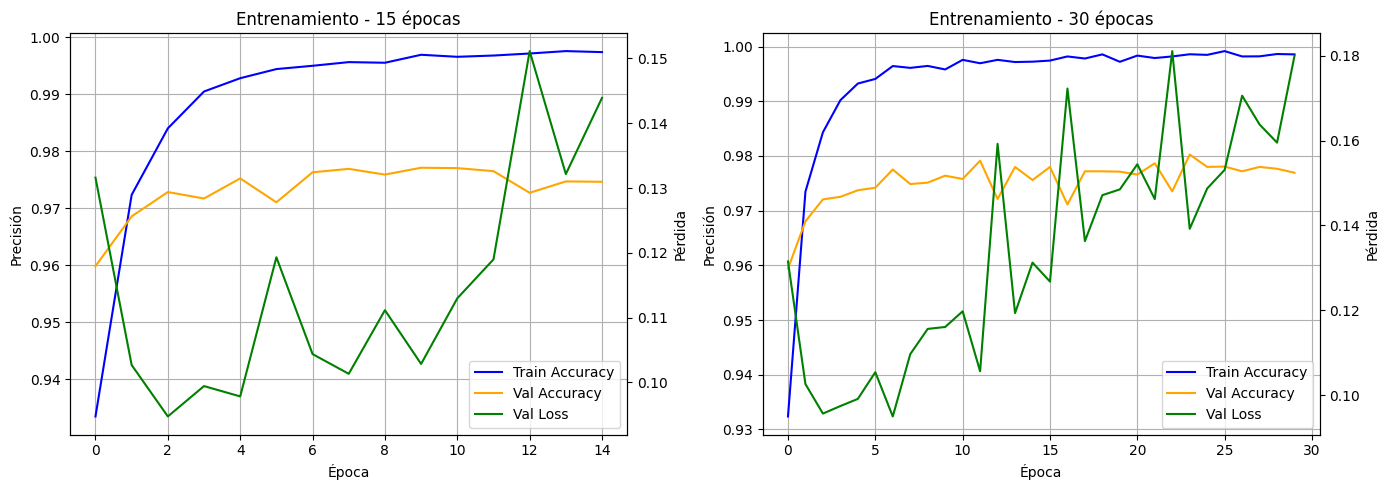

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# --------- Gráfico de 15 épocas ---------
# Eje izquierdo
ax1a = ax1
line1, = ax1a.plot(training_history_15epoch.history['accuracy'], label='Train Accuracy', color='blue')
line2, = ax1a.plot(training_history_15epoch.history['val_accuracy'], label='Val Accuracy', color='orange')
ax1a.set_ylabel('Precisión')
ax1a.set_xlabel('Época')
ax1a.grid(True)

# Eje derecho
ax1b = ax1a.twinx()
line3, = ax1b.plot(training_history_15epoch.history['val_loss'], label='Val Loss', color='green')
ax1b.set_ylabel('Pérdida')

# Leyenda conjunta
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]
ax1a.legend(lines, labels, loc='lower right', bbox_to_anchor=(1.0, 0.0))
ax1.set_title('Entrenamiento - 15 épocas')

# --------- Gráfico de 30 épocas ---------
# Eje izquierdo
ax2a = ax2
line4, = ax2a.plot(training_history_30epoch.history['accuracy'], label='Train Accuracy', color='blue')
line5, = ax2a.plot(training_history_30epoch.history['val_accuracy'], label='Val Accuracy', color='orange')
ax2a.set_ylabel('Precisión')
ax2a.set_xlabel('Época')
ax2a.grid(True)

# Eje derecho
ax2b = ax2a.twinx()
line6, = ax2b.plot(training_history_30epoch.history['val_loss'], label='Val Loss', color='green')
ax2b.set_ylabel('Pérdida')

# Leyenda conjunta
lines2 = [line4, line5, line6]
labels2 = [line.get_label() for line in lines2]
ax2a.legend(lines2, labels2, loc='lower right', bbox_to_anchor=(1.0, 0.0))
ax2.set_title('Entrenamiento - 30 épocas')

plt.tight_layout()
plt.show()

Este fragmento de código genera una visualización comparativa del proceso de entrenamiento de los dos modelos: uno entrenado durante 15 épocas y otro durante 30. Para ello, se utilizan dos gráficos colocados en paralelo, lo que permite observar claramente cómo evolucionan las métricas principales en cada caso.

Se utiliza la función `plt.subplots(1, 2, figsize=(14, 5))` para crear una figura con una fila y dos columnas de gráficos. En cada uno de ellos se representa, en el eje izquierdo, la evolución de la precisión sobre el conjunto de entrenamiento (`accuracy`) y sobre el conjunto de validación (`val_accuracy`). Al mismo tiempo, se añade un segundo eje vertical, superpuesto, para representar la pérdida en validación (`val_loss`), con el fin de no distorsionar la escala de la precisión y poder visualizar ambas métricas simultáneamente.

Para cada gráfico se definen tres líneas, que se almacenan en variables específicas para luego construir una leyenda conjunta. Esta leyenda se sitúa en la parte inferior derecha del área de trazado correspondiente mediante `bbox_to_anchor=(1.0, 0.0)`, lo que permite que todas las métricas se identifiquen claramente sin superponerse al contenido del gráfico.

Finalmente, se ajusta el espaciado con `plt.tight_layout()` para evitar solapamientos y se muestra la figura con `plt.show()`.

La gráfica muestra la evolución del entrenamiento de los modelos, incluyendo las métricas de exactitud (*accuracy*) y pérdida (*loss*) tanto en entrenamiento como en validación.

En el entrenamiento de 15 épocas, la exactitud sobre el conjunto de entrenamiento mejora progresivamente hasta rozar el 0.999 en las últimas iteraciones. Sin embargo, el mejor valor de exactitud en validación se alcanza de forma temprana, concretamente en la época 4. A partir de ese punto, no se registran mejoras y la pérdida en validación comienza a incrementarse, señal clara de que el modelo empieza a sobreajustarse, aprendiendo patrones específicos del entrenamiento que no se traducen en un mejor rendimiento sobre datos no vistos.

En el caso del entrenamiento de 30 épocas, se observa una dinámica similar. La exactitud en entrenamiento se mantiene elevada desde las primeras épocas. El mejor resultado de exactitud en validación se alcanza en la época 6, con una mejora marginal adicional en torno a la época 12. No obstante, más allá de ese punto no se produce un avance real en el desempeño del modelo sobre el conjunto de validación. La pérdida de validación muestra una variabilidad creciente, con oscilaciones que evidencian inestabilidad en la capacidad de generalización.

En conjunto, ambos entrenamientos muestran que la mejora en validación se produce en fases tempranas del proceso y que extender el entrenamiento más allá de las épocas 7–12 no aporta beneficios reales, sino que incrementa el riesgo de sobreajuste. Estos resultados justifican el uso de técnicas como la detención temprana (*early stopping*) para identificar automáticamente el punto de parada óptimo.


# 8. Early stop

En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (*loss*) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

Este fragmento define una clase personalizada llamada `myCallback`, que hereda de una clase especial de Keras llamada `Callback`, diseñada para ejecutar acciones automáticas durante el entrenamiento del modelo. Su propósito es permitir que el entrenamiento se detenga anticipadamente cuando se cumpla una condición específica. La clase se estructura en cuatro partes:

1. **Definición de la clase**: se crea una subclase de `Callback` que puede ser utilizada dentro del entrenamiento del modelo.
2. **Función `on_epoch_end()`**: se ejecuta automáticamente al final de cada época y permite evaluar los resultados obtenidos en esa iteración.
3. **Consulta de la métrica**: mediante `logs.get('accuracy')`, se accede al valor de precisión del entrenamiento en esa época concreta.
4. **Condición de parada**: si la precisión supera el 85%, se imprime un mensaje en pantalla y se activa `self.model.stop_training = True`, que detiene el entrenamiento.

Como se comentaba anteriormente, este tipo de funcionalidad es útil para evitar entrenar más de lo necesario, especialmente cuando se alcanza una precisión aceptable mucho antes del número total de épocas definido. Así se reduce el tiempo de entrenamiento y se minimiza el riesgo de sobreajuste.

En el codigo que se implementará a continuación, la función se adaptará para que tenga en cuenta la **pérdida de validación (`val_loss`)** en lugar de la pérdida sobre el entrenamiento. Esta métrica refleja de forma más precisa cómo se comporta el modelo frente a datos no vistos, lo que la convierte en una mejor referencia para decidir cuándo detener el entrenamiento. Al monitorizar `val_loss`, se puede identificar el momento en que el modelo deja de mejorar su capacidad de generalización y así evitar continuar con épocas adicionales que solo contribuirían al sobreajuste.

In [ ]:
# Definimos una clase personalizada que hereda de Callback
class myCallback(tf.keras.callbacks.Callback):

  def __init__(self):
    # Al iniciar, establecemos la mejor pérdida como un valor muy alto
    self.best_loss = float('inf')

  def on_epoch_end(self, epoch, logs={}):
    current_loss = logs.get('val_loss')  # Obtenemos la pérdida de esta época

    # Comprobamos si la pérdida ha aumentado respecto a la mejor registrada
    if current_loss > self.best_loss:
      print(f"\nLa pérdida ha aumentado en la época {epoch+1}, se cancela el entrenamiento.")
      self.model.stop_training = True
    else:
      # Actualizamos la mejor pérdida si esta es menor
      self.best_loss = current_loss

El código define una clase personalizada llamada `myCallback`, diseñada para detener automáticamente el entrenamiento cuando la pérdida de validación (`val_loss`) deje de mejorar.

En primer lugar, se define el método `__init__()`, que se ejecuta al instanciar la clase. En él se inicializa una variable llamada `best_loss` con un valor extremadamente alto (`float('inf')`), lo que garantiza que cualquier pérdida observada en la primera época será considerada una mejora.

Posteriormente, la función `on_epoch_end()` se activa automáticamente al finalizar cada época del entrenamiento. En ella se accede al valor actual de la pérdida de validación mediante `logs.get('val_loss')`.

Si este valor es superior a `best_loss`, significa que el modelo ha dejado de mejorar su capacidad de generalización, por lo que se imprime un mensaje informativo indicando que se ha alcanzado este punto, y se detiene el entrenamiento mediante `self.model.stop_training = True`.

En caso contrario, se actualiza la variable `best_loss` con la nueva pérdida obtenida, ya que representa un avance en el rendimiento del modelo sobre el conjunto de validación. Este enfoque permite evitar entrenamientos innecesarios y reduce el riesgo de sobreajuste.

## Pregunta 8.1.

Consulta la documentación de Keras y aprende cómo podemos utilizar Early stop en nuestro modelos.

### Uso de `EarlyStopping` en Keras

Keras proporciona una herramienta integrada llamada `EarlyStopping` que permite **detener el entrenamiento automáticamente cuando una métrica deja de mejorar**. Es especialmente útil para evitar el *overfitting*, ahorrar tiempo de cómputo y simplificar la configuración de entrenamientos largos.

Esta clase pertenece al módulo `tensorflow.keras.callbacks`, por lo que antes de usarla es necesario importarla usando el siguiente comando:


```python
from tensorflow.keras.callbacks import EarlyStopping
```

#### Parámetros más importantes de `EarlyStopping`

- **`monitor`**: Indica qué métrica se va a observar. Por defecto es `'val_loss'`, pero también puede ser `'val_accuracy'`, `'loss'`, `'accuracy'`, etc.

- **`min_delta`**: Valor mínimo de mejora considerado como significativo. Si la mejora entre épocas no supera este valor, no se contará como mejora real. Por defecto es `0.0`.

- **`patience`**: Número de épocas consecutivas sin mejora antes de detener el entrenamiento. Ayuda a evitar interrupciones por fluctuaciones puntuales. Por defecto es `0`.

- **`verbose`**: Si se establece en `1`, se muestra un mensaje en pantalla cuando el entrenamiento se detiene. Si es `0`, no se muestra nada. Valor por defecto: `0`.

- **`mode`**: Indica cómo se interpreta la métrica monitorizada. Puede ser:

  - `'min'`: Se busca minimizar la métrica (por ejemplo, `'val_loss'`).
  - `'max'`: Se busca maximizar la métrica (por ejemplo, `'val_accuracy'`).
  - `'auto'`: Keras selecciona automáticamente `'min'` o `'max'` según el nombre de la métrica.

- **`restore_best_weights`**: Si se activa (`True`), al detenerse el entrenamiento, se restaurarán automáticamente los pesos que obtuvieron la mejor puntuación. Esto evita quedarse con los pesos de la última época, que podrían ser peores. Por defecto es `False`.

#### Ejemplo práctico


In [ ]:
# Creamos el callback
early_stop = EarlyStopping(
    monitor='val_loss',        # Métrica que queremos observar
    patience=3,                # Número de épocas sin mejora antes de parar
    min_delta=0.001,           # Umbral mínimo de mejora
    verbose=1,                 # Mostrar mensaje cuando se detiene
    restore_best_weights=True  # Recuperar automáticamente los mejores pesos
)

# Entrenamos el modelo usando el callback
model.fit(
    norm_training_images,
    training_labels_onehot,
    epochs=30,
    batch_size=32,
    validation_split=0.25,
    callbacks=[early_stop],   # Aquí pasamos el callback
    verbose=1
)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9948 - loss: 0.0171 - val_accuracy: 0.9753 - val_loss: 0.1007
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9953 - loss: 0.0144 - val_accuracy: 0.9725 - val_loss: 0.1164
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9951 - loss: 0.0145 - val_accuracy: 0.9759 - val_loss: 0.1131
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9966 - loss: 0.0105 - val_accuracy: 0.9737 - val_loss: 0.1187
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


Como se observa tras la ejecución del código, este método permite detener el entrenamiento de forma automática cuando el modelo deja de mejorar, sin necesidad de definir una clase personalizada. En este caso, el proceso se interrumpió tras la cuarta época al no observarse mejoras significativas en la pérdida de validación. Además, se restauraron automáticamente los pesos correspondientes a la mejor época, garantizando que el modelo final mantiene el mejor rendimiento alcanzado durante el entrenamiento. Este mecanismo también puede combinarse con otros *callbacks* como `ModelCheckpoint` para guardar en disco la mejor versión del modelo.

# 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

## Pregunta 9.1

Utilizando la red realizada en el ejercicio 3, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

> *Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

### Modelo ReLU

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_relu = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_relu.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_relu.add(Flatten())

# Añadimos 4 capas ocultas densas con 512 neuronas y activación ReLU
model_relu.add(Dense(512, activation="relu"))
model_relu.add(Dense(512, activation="relu"))
model_relu.add(Dense(512, activation="relu"))
model_relu.add(Dense(512, activation="relu"))

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax
model_relu.add(Dense(10, activation="softmax"))

#### Compilación del modelo

In [ ]:
model_relu.compile(optimizer=Adam(),  # Utilizamos el optimizador Adam
              loss='categorical_crossentropy',  # Función de pérdida para etiquetas en formato one-hot
              metrics=['accuracy'])  # Monitorizamos la tasa de acierto durante el entrenamiento

#### Entrenamiento del modelo

In [ ]:
training_history_relu = model_relu.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8789 - loss: 0.3930 - val_accuracy: 0.9613 - val_loss: 0.1350
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9660 - loss: 0.1205 - val_accuracy: 0.9634 - val_loss: 0.1336
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.9755 - loss: 0.0828 - val_accuracy: 0.9611 - val_loss: 0.1674
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9794 - loss: 0.0685 - val_accuracy: 0.9689 - val_loss: 0.1302
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.9836 - loss: 0.0542 - val_accuracy: 0.9715 - val_loss: 0.1379


### Modelo Sigmoid

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_sigmoid = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_sigmoid.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_sigmoid.add(Flatten())

# Añadimos 4 capas ocultas densas con 512 neuronas y activación Sigmoid
model_sigmoid.add(Dense(512, activation="sigmoid"))
model_sigmoid.add(Dense(512, activation="sigmoid"))
model_sigmoid.add(Dense(512, activation="sigmoid"))
model_sigmoid.add(Dense(512, activation="sigmoid"))

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax
model_sigmoid.add(Dense(10, activation="softmax"))

#### Compilación del modelo

In [ ]:
model_sigmoid.compile(optimizer=Adam(),  # Utilizamos el optimizador Adam
              loss='categorical_crossentropy',  # Función de pérdida para etiquetas en formato one-hot
              metrics=['accuracy'])  # Monitorizamos la tasa de acierto durante el entrenamiento

#### Entrenamiento del modelo

In [ ]:
training_history_sigmoid = model_sigmoid.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.6741 - loss: 0.9302 - val_accuracy: 0.9303 - val_loss: 0.2373
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.9393 - loss: 0.2070 - val_accuracy: 0.9579 - val_loss: 0.1414
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.9605 - loss: 0.1379 - val_accuracy: 0.9613 - val_loss: 0.1368
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.9708 - loss: 0.1000 - val_accuracy: 0.9645 - val_loss: 0.1287
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.9778 - loss: 0.0748 - val_accuracy: 0.9625 - val_loss: 0.1438


### Modelo Leaky ReLU

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_LeakyReLU = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_LeakyReLU.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_LeakyReLU.add(Flatten())

# Añadimos 4 capas ocultas densas de 512 neuronas seguidas de la activación LeakyReLU
model_LeakyReLU.add(Dense(512))  # Capa oculta 1
model_LeakyReLU.add(LeakyReLU())

model_LeakyReLU.add(Dense(512))  # Capa oculta 2
model_LeakyReLU.add(LeakyReLU())

model_LeakyReLU.add(Dense(512))  # Capa oculta 3
model_LeakyReLU.add(LeakyReLU())

model_LeakyReLU.add(Dense(512))  # Capa oculta 4
model_LeakyReLU.add(LeakyReLU())

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax
model_LeakyReLU.add(Dense(10, activation="softmax"))

#### Compilación del modelo

In [ ]:
model_LeakyReLU.compile(optimizer=Adam(),  # Utilizamos el optimizador Adam
              loss='categorical_crossentropy',  # Función de pérdida para etiquetas en formato one-hot
              metrics=['accuracy'])  # Monitorizamos la tasa de acierto durante el entrenamiento

#### Entrenamiento del modelo

In [ ]:
training_history_LeakyReLU = model_LeakyReLU.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.8692 - loss: 0.4239 - val_accuracy: 0.9371 - val_loss: 0.2270
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9426 - loss: 0.1950 - val_accuracy: 0.9562 - val_loss: 0.1501
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9592 - loss: 0.1421 - val_accuracy: 0.9567 - val_loss: 0.1603
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9659 - loss: 0.1138 - val_accuracy: 0.9543 - val_loss: 0.1886
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.9674 - loss: 0.1102 - val_accuracy: 0.9577 - val_loss: 0.1737


En esta prueba se han entrenado tres redes neuronales con la misma arquitectura, variando únicamente la función de activación en las capas ocultas: *ReLU*, *sigmoid* y *LeakyReLU*. Cada red cuenta con cuatro capas densas de 512 neuronas y una capa final *softmax* con 10 salidas. El objetivo era comparar cómo afecta esta elección al comportamiento del modelo durante cinco épocas de entrenamiento.

Desde la primera época, las redes con *ReLU* y *LeakyReLU* parten con un *accuracy* superior al de *sigmoid*, alcanzando aproximadamente un 87.9 % y 86.9 % respectivamente, frente al 67.4 % inicial del modelo con función sigmoide. No obstante, a partir de la segunda época, la red con *sigmoid* mejora rápidamente y termina obteniendo resultados comparables a los otros dos modelos, con una exactitud final del 97.78 %.

En cuanto a la evolución de la pérdida de validación (`val_loss`), el modelo con *ReLU* muestra un comportamiento algo irregular. A pesar de obtener la mejor exactitud en validación en la quinta época (97.15 %), la pérdida de validación aumenta tras la tercera, alcanzando un valor de 0.1379 al final del entrenamiento. El modelo con *LeakyReLU* presenta una dinámica menos estable, con su mejor exactitud en validación en la segunda época (95.67 %) y una pérdida que crece desde la tercera, cerrando con un valor de 0.1737. En contraste, el modelo con *sigmoid* alcanza su mejor rendimiento general en la cuarta época (96.45 % de *accuracy* en validación y *val\_loss* de 0.1287), con una evolución más consistente en términos de generalización.

Aunque los tres modelos alcanzan niveles de exactitud elevados, la evolución de la pérdida de validación sugiere que *sigmoid* ha ofrecido una mejor adaptación al conjunto de validación en este experimento, seguido de cerca por *ReLU*. El comportamiento de *LeakyReLU*, si bien competitivo en términos de *accuracy*, ha sido más inestable en validación, lo que podría estar indicando una mayor sensibilidad al sobreajuste en este caso concreto.

Es posible que, por tratarse de imágenes en escala de grises con valores normalizados entre 0 y 1, la función *sigmoid* no se haya visto penalizada como en otros escenarios más complejos o con arquitecturas más profundas. Al operar dentro de su rango óptimo de entrada, se reduce el efecto del *vanishing gradient*. No obstante, *sigmoid* sigue sin ser una función cero-centrada (*zero-centered*) y su derivada es limitada, por lo que no se recomienda para redes profundas o entrenamientos prolongados, donde *ReLU* y sus variantes suelen comportarse mejor.

Por tanto, aunque *ReLU* continúa siendo la opción más común por su eficiencia y rapidez de convergencia, los resultados muestran que no siempre garantiza la mejor generalización. En este experimento, *sigmoid* ha sorprendido con un rendimiento competitivo y estable, mientras que *LeakyReLU*, aunque prometedora, ha requerido mayor atención por su mayor oscilación en validación.

# 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

## Pregunta 10.1

Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

Antes de comenzar a escribir el código, es importante comprender qué significa la **inicialización de parámetros**. Los nodos de una red neuronal están compuestos por parámetros como los pesos (*weights*) y los sesgos (*biases*), que son entrenados mediante algoritmos como el descenso de gradiente. Sin embargo, antes de que el modelo empiece a aprender, es necesario establecer valores iniciales para esos pesos. Esta decisión afecta directamente tanto a la velocidad de convergencia como a la calidad del entrenamiento.

En este ejercicio vamos a comparar tres estrategias de inicialización distintas:

- **Inicialización con ceros**:
  Asignar el valor 0 a todos los pesos provoca que todas las neuronas comiencen con el mismo valor y reciban los mismos gradientes. Como consecuencia, se actualizan de forma idéntica en cada iteración, impidiendo que la red rompa la simetría y aprenda representaciones distintas. Esta estrategia, aunque sencilla, inutiliza la capacidad de la red para aprender de forma eficaz.

- **Inicialización aleatoria (distribución normal)**:
  Consiste en asignar pesos iniciales aleatorios siguiendo una distribución gaussiana. Esta estrategia ayuda a romper la simetría inicial y permite que cada neurona evolucione de forma diferente durante el entrenamiento. Es una aproximación más efectiva que la inicialización con ceros, aunque en redes profundas puede no ser suficiente para garantizar una propagación estable de los gradientes.

- **Inicialización por defecto en Keras (*Glorot Uniform*)**:
  Es la estrategia que utiliza Keras por defecto al definir una capa *Dense*. Se basa en la llamada inicialización *Glorot* (también conocida como *Xavier*), que ajusta la varianza de los pesos teniendo en cuenta tanto el número de entradas como de salidas de cada neurona. Su objetivo es mantener una activación equilibrada entre capas, evitando que los gradientes se desvanezcan o se amplifiquen excesivamente. Resulta especialmente eficaz con funciones de activación simétricas, aunque también se utiliza ampliamente en redes con ReLU.

A continuación, se implementarán las distintas estrategias en modelos equivalentes para observar sus diferencias en precisión, pérdida y estabilidad durante el entrenamiento.

### Inicialización con ceros

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_init_zeros = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_init_zeros.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_init_zeros.add(Flatten())

# Añadimos 4 capas ocultas densas con 512 neuronas, activación ReLU e inicialización con ceros
model_init_zeros.add(Dense(512, activation="relu", kernel_initializer="zeros"))
model_init_zeros.add(Dense(512, activation="relu", kernel_initializer="zeros"))
model_init_zeros.add(Dense(512, activation="relu", kernel_initializer="zeros"))
model_init_zeros.add(Dense(512, activation="relu", kernel_initializer="zeros"))

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax, también con inicialización a ceros
model_init_zeros.add(Dense(10, activation="softmax", kernel_initializer="zeros"))

#### Compilación del modelo

In [ ]:
model_init_zeros.compile(optimizer=Adam(),  # Utilizamos el optimizador Adam
              loss='categorical_crossentropy',  # Función de pérdida para etiquetas en formato one-hot
              metrics=['accuracy'])  # Monitorizamos la tasa de acierto durante el entrenamiento

#### Entrenamiento del modelo

In [ ]:
training_history_init_zeros = model_init_zeros.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.1115 - loss: 2.3016 - val_accuracy: 0.1076 - val_loss: 2.3020
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.1153 - loss: 2.3008 - val_accuracy: 0.1076 - val_loss: 2.3020
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.1153 - loss: 2.3007 - val_accuracy: 0.1076 - val_loss: 2.3020
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.1153 - loss: 2.3007 - val_accuracy: 0.1076 - val_loss: 2.3020
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.1153 - loss: 2.3007 - val_accuracy: 0.1076 - val_loss: 2.3020


### Inicialización aleatoria (distribución normal)

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_init_random = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_init_random.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_init_random.add(Flatten())

# Añadimos 4 capas ocultas densas con 512 neuronas, activación ReLU e inicialización aleatoria normal
model_init_random.add(Dense(512, activation="relu", kernel_initializer="random_normal"))
model_init_random.add(Dense(512, activation="relu", kernel_initializer="random_normal"))
model_init_random.add(Dense(512, activation="relu", kernel_initializer="random_normal"))
model_init_random.add(Dense(512, activation="relu", kernel_initializer="random_normal"))

# Añadimos la capa de salida con 10 neuronas (una por clase), también con inicialización aleatoria normal
model_init_random.add(Dense(10, activation="softmax", kernel_initializer="random_normal"))

#### Compilación del modelo

In [ ]:
model_init_random.compile(optimizer=Adam(),  # Utilizamos el optimizador Adam
              loss='categorical_crossentropy',  # Función de pérdida para etiquetas en formato one-hot
              metrics=['accuracy'])  # Monitorizamos la tasa de acierto durante el entrenamiento

#### Entrenamiento del modelo

In [ ]:
training_history_init_random = model_init_random.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.8828 - loss: 0.3838 - val_accuracy: 0.9576 - val_loss: 0.1543
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.9659 - loss: 0.1213 - val_accuracy: 0.9667 - val_loss: 0.1289
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.9745 - loss: 0.0875 - val_accuracy: 0.9677 - val_loss: 0.1376
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9816 - loss: 0.0654 - val_accuracy: 0.9665 - val_loss: 0.1678
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9843 - loss: 0.0521 - val_accuracy: 0.9723 - val_loss: 0.1353


### Inicialización por defecto en Keras (*Glorot Uniform*)

#### Definición del modelo

Aunque en Keras la inicialización por defecto del parámetro `kernel_initializer` en las capas densas es `glorot_uniform`, y por tanto no es necesario indicarlo explícitamente, en el siguiente modelo se especificará de forma intencionada. Esto se hace con el objetivo de destacar que se está utilizando esta estrategia concreta, facilitando así la comparación con otras formas de inicialización implementadas en los apartados siguientes.

In [ ]:
# Definimos el modelo como una secuencia de capas
model_init_glorot = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_init_glorot.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_init_glorot.add(Flatten())

# Añadimos 4 capas ocultas densas con 512 neuronas, activación ReLU e inicialización Glorot Uniform
model_init_glorot.add(Dense(512, activation="relu", kernel_initializer="glorot_uniform"))
model_init_glorot.add(Dense(512, activation="relu", kernel_initializer="glorot_uniform"))
model_init_glorot.add(Dense(512, activation="relu", kernel_initializer="glorot_uniform"))
model_init_glorot.add(Dense(512, activation="relu", kernel_initializer="glorot_uniform"))

# Añadimos la capa de salida con 10 neuronas (una por clase), también con inicialización Glorot Uniform
model_init_glorot.add(Dense(10, activation="softmax", kernel_initializer="glorot_uniform"))

#### Compilación del modelo

In [ ]:
model_init_glorot.compile(optimizer=Adam(),  # Utilizamos el optimizador Adam
              loss='categorical_crossentropy',  # Función de pérdida para etiquetas en formato one-hot
              metrics=['accuracy'])  # Monitorizamos la tasa de acierto durante el entrenamiento

#### Entrenamiento del modelo

In [ ]:
training_history_init_glorot = model_init_glorot.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8779 - loss: 0.3940 - val_accuracy: 0.9571 - val_loss: 0.1495
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.9664 - loss: 0.1192 - val_accuracy: 0.9683 - val_loss: 0.1218
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9762 - loss: 0.0855 - val_accuracy: 0.9687 - val_loss: 0.1273
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9805 - loss: 0.0663 - val_accuracy: 0.9603 - val_loss: 0.1857
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9847 - loss: 0.0512 - val_accuracy: 0.9683 - val_loss: 0.1392


Como se observa en los resultados obtenidos, la estrategia de inicialización de parámetros influye notablemente en el rendimiento del modelo.

La **inicialización con ceros** impide completamente el aprendizaje: tanto la exactitud como la pérdida se mantienen constantes a lo largo de todas las épocas, con una exactitud en torno al 11 % y una pérdida fija de aproximadamente 2.30, lo que indica que la red no está actualizando los pesos de forma efectiva. Esto se debe a que todas las neuronas comienzan con los mismos valores y, al no romperse la simetría, aprenden exactamente lo mismo, inutilizando la profundidad del modelo.

En contraste, la inicialización aleatoria con distribución normal permite que el modelo aprenda desde la primera época, alcanzando una exactitud del 88 % y una pérdida de 0.38 ya en el primer paso de entrenamiento. A lo largo de las épocas siguientes, la exactitud en entrenamiento supera el 98 %, pero la pérdida en validación muestra un patrón irregular: tras una primera mejora, comienza a incrementarse, alcanzando un valor de 0.1678 en la época 4. Aunque la exactitud en validación se recupera ligeramente en la última época (97.23 %), este comportamiento sugiere que el modelo comienza a sobreajustarse progresivamente, lo que afecta negativamente a su capacidad de generalización.

Por último, la inicialización *glorot\_uniform*, que es el valor por defecto en Keras para capas *Dense*, ofrece un aprendizaje más gradual pero también más estable. La exactitud inicial es similar a la de la inicialización aleatoria (87.79 %) y mejora de forma constante hasta superar el 98 %. La pérdida en validación desciende inicialmente hasta alcanzar 0.1218 en la época 2, pero presenta una subida notable en la época 4 (0.1857), que luego se atenúa. Aunque también hay signos de sobreajuste, las oscilaciones son más contenidas y la evolución del entrenamiento resulta más predecible. Esto refleja un mejor equilibrio entre aprendizaje y generalización, resultado del ajuste que realiza *Glorot* sobre la varianza de los pesos iniciales en función del número de entradas y salidas.

Se puede concluir que solo las estrategias que introducen diversidad en los valores iniciales permiten que la red aprenda. Entre ellas, *glorot\_uniform* proporciona un comportamiento más equilibrado y predecible, lo que la convierte en una opción más recomendable frente a la aleatoriedad sin control.

# 11. Optimizadores

## Pregunta 11.1

Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de RMSprop es buena idea dejar los valores por defecto provistos por Keras).

Antes de comenzar a comparar los distintos optimizadores, es importante entender su función dentro del entrenamiento de una red neuronal. Los optimizadores son los responsables de actualizar los pesos del modelo tras cada paso del algoritmo de retropropagación, y su configuración afecta directamente a la velocidad de convergencia, la estabilidad del aprendizaje y la capacidad del modelo para generalizar. Existen diversos algoritmos de optimización, cada uno con sus propias estrategias para ajustar los parámetros de la red y controlar el descenso del error.

En este ejercicio se evaluarán cinco optimizadores ampliamente utilizados (**SGD**, **SGD con momentum**, **Adagrad**, **RMSprop** y **Adam**)

### SGD (Stochastic Gradient Descent)

El **descenso de gradiente** es el optimizador más básico. Actualiza los pesos del modelo tomando pequeños pasos en la dirección opuesta al gradiente del error. En lugar de calcular el gradiente sobre todo el conjunto de datos, lo hace usando muestras individuales o *mini-batches*, lo que lo hace más rápido pero también más sensible al ruido. Aunque simple, sigue siendo una base sólida para muchos modelos y permite incorporar mejoras como *momentum* o aceleración de Nesterov. Su comportamiento puede ajustarse mediante varios hiperparámetros:

- `learning_rate`: Define la magnitud de los pasos que da el optimizador al actualizar los pesos. Un valor alto acelera el entrenamiento pero puede dificultar la convergencia; uno bajo es más estable pero lento. Valor por defecto: `0.01`.

- `momentum`: Introduce una memoria del gradiente anterior para suavizar las actualizaciones. Esto evita oscilaciones y ayuda a escapar de mínimos locales. Valor típico: `0.9`. Por defecto: `0.0`.

- `nesterov`: Si se activa (`True`), aplica una variante del *momentum* llamada *Nesterov accelerated gradient*, que anticipa la dirección futura del gradiente. Puede mejorar la convergencia en ciertos problemas. Por defecto: `False`.

- `weight_decay`: Añade penalización sobre los pesos durante el entrenamiento, útil para regularización (*L2*). Por defecto: `None`.

- `clipnorm` / `clipvalue`: Permiten limitar el valor máximo de los gradientes para evitar explosiones durante el entrenamiento. `clipnorm` restringe la norma del vector de gradiente; `clipvalue` limita cada componente. Por defecto: `None`.

- `use_ema`: Activa el uso de *Exponential Moving Average* sobre los pesos del modelo, lo que puede estabilizar el entrenamiento. Por defecto: `False`.

- `ema_momentum`: Controla la velocidad de actualización del promedio exponencial si `use_ema` está activo. Por defecto: `0.99`.

- `loss_scale_factor`, `gradient_accumulation_steps`, `global_clipnorm`, `ema_overwrite_frequency`: Son parámetros avanzados para configuraciones específicas (por ejemplo, entrenamiento distribuido, precisión mixta o acumulación de gradientes). En la mayoría de los casos, no es necesario modificarlos.

### SGD con *momentum*

Este optimizador no es una variante diferente, sino el mismo **SGD** al que se le asigna un valor distinto del cero al hiperparámetro `momentum`. Al hacerlo, se introduce una componente de inercia en la actualización de los pesos: además del gradiente actual, el optimizador tiene en cuenta la dirección de los pasos anteriores. Esto permite que el descenso de gradiente avance de forma más estable, reduciendo oscilaciones, superando regiones planas y acercándose al mínimo con mayor fluidez. En Keras, se activa directamente con `momentum=0.9` al instanciar el optimizador `SGD`.

### Adagrad

**Adagrad** es un optimizador adaptativo que ajusta automáticamente el *learning rate* de cada parámetro durante el entrenamiento. A diferencia de *SGD*, que aplica una tasa de aprendizaje constante, Adagrad acumula el cuadrado de los gradientes anteriores para cada parámetro y utiliza esa información para reducir progresivamente su tasa de aprendizaje individual. De este modo, los parámetros que se actualizan con frecuencia reciben pasos más pequeños, mientras que los menos activos mantienen una mayor capacidad de ajuste. Esta propiedad lo hace especialmente útil en contextos con datos dispersos o variables poco frecuentes. No obstante, una de sus limitaciones es que la acumulación continua puede hacer que el *learning rate* se reduzca en exceso, lo que ralentiza o detiene el aprendizaje en fases avanzadas. Para controlar este comportamiento, Adagrad  también permite ajustar varios hiperparámetros:

- `learning_rate`: Tasa inicial de aprendizaje. Se ajusta automáticamente durante el entrenamiento. Valor por defecto: `0.001`.

- `initial_accumulator_value`: Valor inicial para la acumulación de gradientes. Si es muy bajo, puede provocar inestabilidad en los primeros pasos. Por defecto: `0.1`.

- `epsilon`: Valor pequeño añadido para evitar divisiones por cero durante la normalización del gradiente. Por defecto: `1e-7`.

- `weight_decay`, `clipnorm`, `clipvalue`, `use_ema`, `ema_momentum`, etc.: Parámetros adicionales similares a los de otros optimizadores, usados para regularización, estabilización o entrenamiento avanzado. No es necesario modificarlos en usos estándar.

### RMSprop

**RMSprop** es un optimizador adaptativo que mejora las limitaciones de Adagrad al evitar que el *learning rate* disminuya de forma indefinida. Para ello, en lugar de acumular todos los gradientes pasados, mantiene un promedio móvil de los cuadrados de los gradientes recientes. Esto permite ajustar dinámicamente la tasa de aprendizaje por parámetro, dando pasos más pequeños en direcciones con gradientes grandes y pasos más amplios donde los gradientes son más pequeños. Este enfoque estabiliza el entrenamiento y lo hace especialmente adecuado para redes recurrentes o situaciones con gradientes oscilantes. Como ocurre en otros optimizadores, su comportamiento puede controlarse mediante varios hiperparámetros relevantes:

- `learning_rate`: Tasa base de aprendizaje. Se adapta a lo largo del entrenamiento según la media de gradientes. Valor por defecto: `0.001`.

- `rho`: Factor de decaimiento para calcular el promedio exponencial de los gradientes al cuadrado. Controla cuánta memoria se conserva del pasado. Por defecto: `0.9`.

- `epsilon`: Pequeño valor añadido al denominador para evitar divisiones por cero. Por defecto: `1e-7`.

- `momentum`: Si se activa, acumula gradientes anteriores como en *SGD con momentum*. Por defecto: `0.0`.

- `centered`: Si es `True`, normaliza también respecto a la media de los gradientes (además de su cuadrado), lo que puede mejorar la estabilidad. Por defecto: `False`.

- `weight_decay`, `clipnorm`, `clipvalue`, `use_ema`, `ema_momentum`, etc.: Parámetros adicionales que permiten estabilizar y regularizar el entrenamiento en escenarios más avanzados.

### Adam

**Adam** (*Adaptive Moment Estimation*) es uno de los optimizadores más utilizados actualmente por su eficacia y facilidad de uso. Combina las ventajas de **momentum** y de métodos adaptativos como **Adagrad** y **RMSprop**. Por un lado, acumula un promedio exponencial de los gradientes pasados (como *momentum*) para mantener la dirección de descenso más estable, y por otro, ajusta automáticamente el *learning rate* por parámetro utilizando una media de los gradientes al cuadrado (como *RMSprop*). Esto permite realizar actualizaciones eficientes incluso en problemas complejos, con poco ajuste manual de hiperparámetros. Su comportamiento puede refinarse mediante los siguientes parámetros:

#### Argumentos principales en `keras.optimizers.Adam()`

- `learning_rate`: Tasa base de aprendizaje. Por defecto: `0.001`.

- `beta_1`: Coeficiente de decaimiento para el promedio de los gradientes (el término de *momentum*). Por defecto: `0.9`.

- `beta_2`: Coeficiente de decaimiento para el promedio de los gradientes al cuadrado (la parte adaptativa). Por defecto: `0.999`.

- `epsilon`: Valor pequeño para evitar divisiones por cero en la normalización del gradiente. Por defecto: `1e-7`.

- `amsgrad`: Si se activa, utiliza una variante del algoritmo que garantiza que los denominadores no decrezcan, mejorando la estabilidad en ciertos casos. Por defecto: `False`.

- `weight_decay`, `clipnorm`, `clipvalue`, `use_ema`, `ema_momentum`, etc.: Hiperparámetros adicionales presentes en otros optimizadores, que pueden utilizarse para regularización y control avanzado del entrenamiento.

## 11.2 Comparación práctica de optimizadores en el entrenamiento de redes neuronales

Ahora que ya se han descrito las principales estrategias de optimización y se conocen sus fundamentos y parámetros configurables, se precederá a entrenar una misma red neuronal utilizando cada uno de los optimizadores presentados. Para garantizar la coherencia en la comparación, se mantendrá constante la arquitectura del modelo, así como la estrategia de inicialización previamente identificada como más efectiva (`glorot_uniform`). El objetivo es observar y analizar las diferencias en el comportamiento de cada optimizador durante el entrenamiento, prestando especial atención a la velocidad de convergencia, la estabilidad de las métricas y la capacidad de generalización.

### `SGD`

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_opt_SGD = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_opt_SGD.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_opt_SGD.add(Flatten())

# Añadimos 4 capas ocultas densas de 512 neuronas seguidas de la activación LeakyReLU
model_opt_SGD.add(Dense(512))  # Capa oculta 1
model_opt_SGD.add(LeakyReLU())

model_opt_SGD.add(Dense(512))  # Capa oculta 2
model_opt_SGD.add(LeakyReLU())

model_opt_SGD.add(Dense(512))  # Capa oculta 3
model_opt_SGD.add(LeakyReLU())

model_opt_SGD.add(Dense(512))  # Capa oculta 4
model_opt_SGD.add(LeakyReLU())

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax
model_opt_SGD.add(Dense(10, activation="softmax"))

#### Compilación del modelo

In [ ]:
# Compilamos el modelo usando SGD como optimizador
model_opt_SGD.compile(
    optimizer=SGD(learning_rate=0.01),  # Utilizamos el optimizador SDG con su tasa de aprendizaje habitual
    loss='categorical_crossentropy',    # Función de pérdida para etiquetas en formato one-hot
    metrics=['accuracy']                # Monitorizamos la tasa de acierto durante el entrenamiento
)

#### Entrenamiento del modelo

In [ ]:
training_history_opt_SGD = model_opt_SGD.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.7301 - loss: 1.0504 - val_accuracy: 0.9108 - val_loss: 0.3025
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9131 - loss: 0.2951 - val_accuracy: 0.9305 - val_loss: 0.2418
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9321 - loss: 0.2327 - val_accuracy: 0.9419 - val_loss: 0.2064
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9454 - loss: 0.1920 - val_accuracy: 0.9489 - val_loss: 0.1819
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9537 - loss: 0.1625 - val_accuracy: 0.9527 - val_loss: 0.1650


### `SGD` con *momentum*

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_opt_momentum = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_opt_momentum.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_opt_momentum.add(Flatten())

# Añadimos 4 capas ocultas densas de 512 neuronas seguidas de la activación LeakyReLU
model_opt_momentum.add(Dense(512))  # Capa oculta 1
model_opt_momentum.add(LeakyReLU())

model_opt_momentum.add(Dense(512))  # Capa oculta 2
model_opt_momentum.add(LeakyReLU())

model_opt_momentum.add(Dense(512))  # Capa oculta 3
model_opt_momentum.add(LeakyReLU())

model_opt_momentum.add(Dense(512))  # Capa oculta 4
model_opt_momentum.add(LeakyReLU())

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax
model_opt_momentum.add(Dense(10, activation="softmax"))

#### Compilación del modelo

In [ ]:
# Compilamos el modelo usando SGD como optimizador
model_opt_momentum.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),  # Utilizamos el optimizador SDG con su tasa de aprendizaje habitual y le añadimos momentum
    loss='categorical_crossentropy',                  # Función de pérdida para etiquetas en formato one-hot
    metrics=['accuracy']                              # Monitorizamos la tasa de acierto durante el entrenamiento
)

#### Entrenamiento del modelo

In [ ]:
training_history_opt_momentum = model_opt_momentum.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8346 - loss: 0.5405 - val_accuracy: 0.9491 - val_loss: 0.1633
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.9565 - loss: 0.1435 - val_accuracy: 0.9601 - val_loss: 0.1259
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 46s 20ms/step - accuracy: 0.9710 - loss: 0.0943 - val_accuracy: 0.9661 - val_loss: 0.1112
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.9797 - loss: 0.0667 - val_accuracy: 0.9669 - val_loss: 0.1178
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9842 - loss: 0.0520 - val_accuracy: 0.9631 - val_loss: 0.1410


### `Adagrad`

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_opt_adagrad = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_opt_adagrad.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_opt_adagrad.add(Flatten())

# Añadimos 4 capas ocultas densas de 512 neuronas seguidas de la activación LeakyReLU
model_opt_adagrad.add(Dense(512))  # Capa oculta 1
model_opt_adagrad.add(LeakyReLU())

model_opt_adagrad.add(Dense(512))  # Capa oculta 2
model_opt_adagrad.add(LeakyReLU())

model_opt_adagrad.add(Dense(512))  # Capa oculta 3
model_opt_adagrad.add(LeakyReLU())

model_opt_adagrad.add(Dense(512))  # Capa oculta 4
model_opt_adagrad.add(LeakyReLU())

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax
model_opt_adagrad.add(Dense(10, activation="softmax"))

#### Compilación del modelo

In [ ]:
# Compilamos el modelo usando Adagrad como optimizador
model_opt_adagrad.compile(
    optimizer=Adagrad(learning_rate=0.001),  # Utilizamos el optimizador Adagrad con su tasa de aprendizaje habitual
    loss='categorical_crossentropy',         # Función de pérdida para etiquetas en formato one-hot
    metrics=['accuracy']                     # Monitorizamos la tasa de acierto durante el entrenamiento
)

#### Entrenamiento del modelo

In [ ]:
training_history_opt_adagrad = model_opt_adagrad.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.5898 - loss: 1.6520 - val_accuracy: 0.8749 - val_loss: 0.4682
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.8794 - loss: 0.4435 - val_accuracy: 0.9014 - val_loss: 0.3448
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.8998 - loss: 0.3479 - val_accuracy: 0.9117 - val_loss: 0.3048
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.9097 - loss: 0.3095 - val_accuracy: 0.9189 - val_loss: 0.2817
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9161 - loss: 0.2851 - val_accuracy: 0.9238 - val_loss: 0.2653


### `RMSprop`

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_opt_RMSprop = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_opt_RMSprop.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_opt_RMSprop.add(Flatten())

# Añadimos 4 capas ocultas densas de 512 neuronas seguidas de la activación LeakyReLU
model_opt_RMSprop.add(Dense(512))  # Capa oculta 1
model_opt_RMSprop.add(LeakyReLU())

model_opt_RMSprop.add(Dense(512))  # Capa oculta 2
model_opt_RMSprop.add(LeakyReLU())

model_opt_RMSprop.add(Dense(512))  # Capa oculta 3
model_opt_RMSprop.add(LeakyReLU())

model_opt_RMSprop.add(Dense(512))  # Capa oculta 4
model_opt_RMSprop.add(LeakyReLU())

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax
model_opt_RMSprop.add(Dense(10, activation="softmax"))

#### Compilación del modelo

In [ ]:
# Compilamos el modelo usando RMSprop como optimizador
model_opt_RMSprop.compile(
    optimizer=RMSprop(learning_rate=0.001), # Utilizamos el optimizador RMSprop con su tasa de aprendizaje habitual
    loss='categorical_crossentropy',        # Función de pérdida para etiquetas en formato one-hot
    metrics=['accuracy']                    # Monitorizamos la tasa de acierto durante el entrenamiento
)

#### Entrenamiento del modelo

In [ ]:
training_history_opt_RMSprop = model_opt_RMSprop.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.8504 - loss: 0.5017 - val_accuracy: 0.8744 - val_loss: 0.5030
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9416 - loss: 0.2083 - val_accuracy: 0.9383 - val_loss: 0.2728
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9556 - loss: 0.1617 - val_accuracy: 0.9518 - val_loss: 0.1983
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.9647 - loss: 0.1308 - val_accuracy: 0.9620 - val_loss: 0.1614
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.9660 - loss: 0.1200 - val_accuracy: 0.9589 - val_loss: 0.2019


### `Adam`

#### Definición del modelo

In [ ]:
# Definimos el modelo como una secuencia de capas
model_opt_adam = keras.models.Sequential()

# Establecemos la forma de entrada con una capa explícita Input
model_opt_adam.add(Input(shape=(28, 28)))  # Entrada de imágenes 28x28 píxeles

# Aplanamos la imagen en un vector de 784 elementos
model_opt_adam.add(Flatten())

# Añadimos 4 capas ocultas densas de 512 neuronas seguidas de la activación LeakyReLU
model_opt_adam.add(Dense(512))  # Capa oculta 1
model_opt_adam.add(LeakyReLU())

model_opt_adam.add(Dense(512))  # Capa oculta 2
model_opt_adam.add(LeakyReLU())

model_opt_adam.add(Dense(512))  # Capa oculta 3
model_opt_adam.add(LeakyReLU())

model_opt_adam.add(Dense(512))  # Capa oculta 4
model_opt_adam.add(LeakyReLU())

# Añadimos la capa de salida con 10 neuronas (una por clase) y activación softmax
model_opt_adam.add(Dense(10, activation="softmax"))

#### Compilación del modelo

In [ ]:
# Compilamos el modelo usando Adam como optimizador
model_opt_adam.compile(
    optimizer=Adam(learning_rate=0.001),  # Utilizamos el optimizador Adam con su tasa de aprendizaje habitual
    loss='categorical_crossentropy',      # Función de pérdida para etiquetas en formato one-hot
    metrics=['accuracy']                  # Monitorizamos la tasa de acierto durante el entrenamiento
)

#### Entrenamiento del modelo

In [ ]:
training_history_opt_adam = model_opt_adam.fit(
    norm_training_images,  # Datos de entrada normalizados
    training_labels_onehot,  # Etiquetas en formato one-hot
    epochs=5,  # Número de pasadas completas sobre el conjunto de entrenamiento
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.25,  # Porcentaje de datos reservados para validación
    verbose=1  # Mostramos el progreso del entrenamiento en cada época
)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - accuracy: 0.8703 - loss: 0.4247 - val_accuracy: 0.9424 - val_loss: 0.2005
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.9465 - loss: 0.1867 - val_accuracy: 0.9522 - val_loss: 0.1718
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.9588 - loss: 0.1437 - val_accuracy: 0.9600 - val_loss: 0.1495
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9662 - loss: 0.1176 - val_accuracy: 0.9553 - val_loss: 0.1610
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9681 - loss: 0.1059 - val_accuracy: 0.9659 - val_loss: 0.1383


El análisis comparativo de los distintos optimizadores empleados revela diferencias sustanciales tanto en el ritmo de convergencia como en la calidad del ajuste alcanzado en el conjunto de validación.

**SGD** ofrece una progresión constante y predecible. A lo largo de las cinco épocas, la *accuracy* de validación mejora de forma estable hasta alcanzar un 95.27 %, mientras que la pérdida desciende progresivamente hasta situarse en 0.1650. Su rendimiento es sólido y no muestra señales de sobreajuste temprano, aunque necesita más pasos para alcanzar este nivel de precisión.

Con **SGD con momentum**, los resultados mejoran notablemente desde la primera época, lo que evidencia una mayor eficiencia en la convergencia gracias a la inercia introducida por el *momentum*. Se alcanza un 96.69 % de *accuracy* de validación en la cuarta época, si bien se observa un ligero incremento en la pérdida en la última (0.1410), lo que podría indicar una estabilización o comienzo de sobreajuste. Aun así, ofrece un excelente compromiso entre velocidad y rendimiento.

En el caso de **Adagrad**, el aprendizaje avanza de forma más pausada. El modelo parte de una *accuracy* de validación inicial significativamente inferior, pero mejora gradualmente hasta un 92.38 % en la quinta época. Esta evolución progresiva sugiere que el modelo se sigue ajustando, aunque con un ritmo menor. Podría beneficiarse de un mayor número de épocas, ya que no muestra señales de haber alcanzado aún su techo de rendimiento.

**RMSprop** presenta un comportamiento algo irregular. Aunque la *accuracy* mejora hasta un 96.20 % en la cuarta época, se observa un repunte de la pérdida en la quinta (0.2019), lo que podría ser indicativo de una oscilación en la adaptación o de cierta inestabilidad. A pesar de ello, su rendimiento global es positivo y competitivo frente a otros métodos.

Finalmente, **Adam** muestra un comportamiento muy eficiente y equilibrado. La *accuracy* de validación alcanza un 96.59 % en la última época, con una pérdida de 0.1383, sin señales claras de sobreajuste. El optimizador aprovecha bien el número limitado de épocas, con una mejora consistente tanto en pérdida como en precisión, y con un coste computacional razonable.

**En conclusión**, el mejor resultado corresponde al modelo entrenado con **SGD con momentum**, seguido muy de cerca por **Adam**, que ofrece un comportamiento más suave y menos dependiente del ajuste manual de hiperparámetros. Ambas opciones son válidas en entornos reales, pero si se dispone de capacidad para afinar el modelo, SGD con momentum podría proporcionar un rendimiento ligeramente superior. Si se prioriza la robustez y facilidad de uso, Adam sigue siendo una de las elecciones más equilibradas.

# 12. Regularización y red final

## Problema 12.1

Entrenar una red final que sea capaz de obtener una accuracy en el validation superior al 95%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

Para el desarrollo de la red final se parte de los aprendizajes extraídos en ejercicios anteriores, manteniendo aquellos parámetros y configuraciones que han demostrado ofrecer un rendimiento estable y efectivo. Concretamente, se conservará el uso de la función de activación *LeakyReLU*, que ha mostrado un buen comportamiento evitando el problema de unidades muertas y favoreciendo una convergencia más fluida en redes profundas. Igualmente, se mantendrá la arquitectura de **cuatro capas ocultas** con un número elevado pero manejable de neuronas: **512 unidades en cada una de ellas**, lo que proporciona una alta capacidad de representación sin inducir por sí solo un sobreajuste prematuro.

También se establecerá un número máximo de **30 épocas**, acompañado de una estrategia de *early stopping*, lo que permitirá detener el entrenamiento de forma automática si no se observa mejora en el conjunto de validación.

En cuanto al optimizador, se evaluarán dos de los que ofrecieron mejores resultados: **SGD con momentum** y **Adam**, con el objetivo de analizar sus posibles diferencias en la red final regularizada.

Además, se incorporarán por primera vez técnicas de regularización explícitas que no se habían explorado hasta ahora: se probarán distintos valores de **`batch_size`**, se incluirán **capas `Dropout`** entre las capas ocultas, y se aplicará regularización **L2** y **Elastic Net**, esta última combina penalizaciones L1 y L2 sobre los pesos de la red. Estas estrategias permitirán mejorar la generalización del modelo y reducir el riesgo de sobreajuste, especialmente en redes profundas como la que se plantea en esta fase final.

### `batch_size`



Antes de seleccionar el tamaño del *batch*, conviene recordar la importancia de mantener una distribución equilibrada de clases durante el entrenamiento. Si los *mini-batches* contienen únicamente ejemplos de una o pocas clases (por ejemplo, todos dígitos “9” en un mismo lote), el modelo podría sesgarse en sus actualizaciones de pesos, generando un aprendizaje inestable o parcial.

Aunque no es necesario que cada *batch* tenga una distribución perfecta, sí se espera que, en conjunto, las clases estén representadas de forma similar en todos ellos. Este equilibrio se logra gracias al parámetro `shuffle=True` de Keras, que mezcla los datos en cada época, evitando que las clases se agrupen en *batches* homogéneos.

Para asegurar este comportamiento, a continuación se comprobará si el conjunto de entrenamiento está equilibrado entre clases antes de probar distintos valores de `batch_size` como 32, 64 o 128.

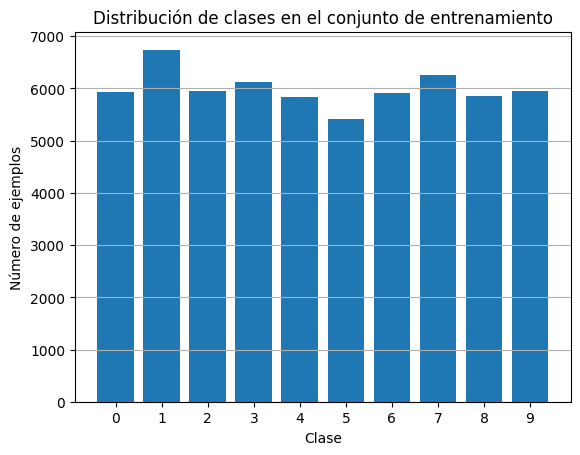

In [ ]:
# Contamos cuántos ejemplos hay por clase y los ordenamos por número de ejemplos (de menos a más)
class_counts = pd.Series(training_labels).value_counts().sort_values()

# Representamos la gráfica ordenada de menos a más
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Clase")
plt.ylabel("Número de ejemplos")
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xticks(class_counts.index)
plt.grid(axis='y')
plt.show()

Este fragmento de código permite visualizar de forma clara la distribución de clases en el conjunto de entrenamiento. En primer lugar, se convierte el array `training_labels` en una serie de pandas para aplicar el método `value_counts()`, que cuenta cuántas veces aparece cada etiqueta (dígito del 0 al 9). Posteriormente, se ordenan los resultados de menor a mayor usando `.sort_values()` para facilitar la lectura visual del posible desequilibrio.

A continuación, se genera una gráfica de barras verticales mediante `plt.bar()`, donde cada barra representa una clase y su altura indica la cantidad de ejemplos asociados. El eje *x* muestra las etiquetas de clase, y el eje *y* refleja el número de ejemplos. Se han añadido también una cuadrícula horizontal y etiquetas descriptivas para mejorar la interpretación.

Al observar el gráfico, se aprecia que la distribución no es perfectamente uniforme, pero sí razonablemente equilibrada. La clase menos representada (dígito 5) cuenta con más de 5.000 ejemplos, mientras que la más frecuente (dígito 1) supera los 6.700. Esta diferencia, aunque no es ideal, no representa un desbalance severo en términos prácticos para el entrenamiento de una red neuronal en tareas de clasificación multiclase.

Dado que el conjunto está lo suficientemente equilibrado, **no es necesario aplicar técnicas adicionales de balanceo** como sobremuestreo (*oversampling*) o submuestreo (*undersampling*). El barajado aleatorio realizado por defecto (`shuffle=True`) será suficiente para garantizar que los *mini-batches* durante el entrenamiento contengan ejemplos variados y representativos de todas las clases.

#### Función para definir modelos

In [ ]:
# Función que genera modelos con arquitectura estándar
def crear_modelo():
    model = keras.models.Sequential()  # Inicializamos el modelo como una secuencia de capas

    model.add(Input(shape=(28, 28)))  # Definimos la capa de entrada para imágenes de 28x28 píxeles
    model.add(Flatten())  # Aplanamos la imagen para convertirla en un vector unidimensional de 784 elementos

    # Añadimos 4 capas ocultas densas con 512 neuronas cada una, seguidas de la activación LeakyReLU
    for _ in range(4):
        model.add(Dense(512))      # Capa densa con 512 unidades
        model.add(LeakyReLU())     # Activación LeakyReLU para evitar el problema de neuronas muertas

    model.add(Dense(10, activation="softmax"))  # Capa de salida con 10 neuronas y activación softmax para clasificación multiclase

    return model  # Devolvemos el modelo construido

Este fragmento define una función llamada `crear_modelo()`, que construye y devuelve un modelo neuronal con una arquitectura estándar, pensada para abordar tareas de clasificación multiclase como MNIST. El modelo se organiza de forma secuencial, es decir, las capas se apilan una tras otra en orden.

En primer lugar, se establece una **capa de entrada** con una forma de `(28, 28)`, correspondiente al tamaño de las imágenes en escala de grises del dataset. A continuación, la función `Flatten()` transforma cada imagen en un vector de 784 elementos, necesario para conectar con las capas densas posteriores.

El bloque central del modelo consta de **cuatro capas ocultas**, cada una compuesta por 512 neuronas. A cada capa densa se le aplica seguidamente una función de activación *LeakyReLU*, la cual permite que las neuronas mantengan un pequeño gradiente cuando la entrada es negativa, evitando así el problema de las unidades muertas que puede aparecer con activaciones como *ReLU*.

Finalmente, se añade una **capa de salida** con 10 neuronas y función de activación *softmax*, apropiada para clasificación multiclase, ya que transforma los valores de salida en probabilidades asociadas a cada clase.

La función termina con la instrucción `return model`, que devuelve el modelo ya definido para que pueda ser compilado y entrenado posteriormente. Gracias a este diseño modular, `crear_modelo()` puede reutilizarse con distintos optimizadores, *batch sizes* o estrategias de regularización sin modificar su estructura interna.

#### Función para entrenar los modelos

In [ ]:
# Función que compila y entrena un modelo con los parámetros definidos
def entrenar_modelo(batch_size, optimizer):
    """
    Entrena un modelo utilizando la arquitectura definida en crear_modelo(),
    con el optimizador y tamaño de batch especificados.
    """
    model = crear_modelo()  # Construimos la arquitectura base

    # Compilamos el modelo con el optimizador indicado
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Entrenamos el modelo con early stopping
    history = model.fit(
        norm_training_images,         # Datos de entrada normalizados
        training_labels_onehot,       # Etiquetas codificadas en one-hot
        epochs=30,                    # Número máximo de épocas
        batch_size=batch_size,        # Tamaño del batch especificado
        validation_split=0.25,        # Porcentaje reservado para validación
        verbose=1,                    # Mostrar resultados por época
        callbacks=[early_stop]        # Detener si no hay mejora
    )

    return model, history

Esta función, llamada `entrenar_modelo()`, automatiza el proceso de compilación y entrenamiento de un modelo de red neuronal. Recibe como argumentos el tamaño del *batch* (`batch_size`) y el optimizador que se desea utilizar. Su finalidad es reutilizar la arquitectura definida previamente en `crear_modelo()` aplicando distintos ajustes de entrenamiento sin duplicar código.

En primer lugar, se construye el modelo llamando a `crear_modelo()`, que genera una red con cuatro capas ocultas y función de activación *LeakyReLU*. A continuación, el modelo se **compila** utilizando el optimizador indicado, junto con la función de pérdida `categorical_crossentropy`, adecuada para clasificación multiclase, y la métrica de `accuracy` para evaluar el rendimiento durante el entrenamiento.

Seguidamente, se inicia el entrenamiento con la función `fit()`, que recorre el conjunto de datos durante un máximo de 30 épocas. El parámetro `batch_size` determina cuántas muestras se procesan antes de actualizar los pesos, y `validation_split=0.25` reserva el 25% del conjunto de entrenamiento para validación interna. El argumento `verbose=1` habilita la visualización detallada del proceso de entrenamiento.

Por último, se incluye un mecanismo de **early stopping** a través del parámetro `callbacks=[early_stop]`, lo que permite interrumpir el entrenamiento si no se observa mejora en la pérdida de validación, evitando así el sobreajuste.

La función devuelve dos objetos: el modelo entrenado y el historial del entrenamiento (`history`), que contiene el seguimiento de métricas por época y puede utilizarse posteriormente para análisis o visualización de resultados. Esta estructura facilita la comparación de distintas configuraciones de forma sistemática y eficiente.

#### Entrenamiento de los modelos

In [ ]:
# Creamos y entrenamos los modelos
# Modelos Adam
model_adam_32, history_adam_32 = entrenar_modelo(batch_size=32, optimizer=Adam())
model_adam_64, history_adam_64 = entrenar_modelo(batch_size=64, optimizer=Adam())
model_adam_128, history_adam_128 = entrenar_modelo(batch_size=128, optimizer=Adam())

# Modelos SGD con momentum
model_momentum_32, history_momentum_32 = entrenar_modelo(batch_size=32, optimizer=SGD(learning_rate=0.01, momentum=0.9))
model_momentum_64, history_momentum_64 = entrenar_modelo(batch_size=64, optimizer=SGD(learning_rate=0.01, momentum=0.9))
model_momentum_128, history_momentum_128 = entrenar_modelo(batch_size=128, optimizer=SGD(learning_rate=0.01, momentum=0.9))

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.8708 - loss: 0.4206 - val_accuracy: 0.9385 - val_loss: 0.2150
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9448 - loss: 0.1855 - val_accuracy: 0.9533 - val_loss: 0.1686
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.9613 - loss: 0.1356 - val_accuracy: 0.9541 - val_loss: 0.1700
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9637 - loss: 0.1240 - val_accuracy: 0.9563 - val_loss: 0.1707
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9692 - loss: 0.1050 - val_accuracy: 0.9554 - val_loss: 0.1833
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.8726 - loss: 0.4150 - val_accuracy: 0.9416 - val_loss: 0.1941
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9520 - loss: 0.1644 - val_accuracy: 0.9555 - val_loss: 0.16

Durante el proceso de entrenamiento se ha observado que los modelos con *batch sizes* más pequeños tienden a tardar más tiempo en completar cada época. Esto se debe a que el conjunto de entrenamiento se divide en un mayor número de bloques más pequeños, lo que incrementa el número total de actualizaciones de pesos que deben realizarse. Aunque cada actualización individual es más rápida, el coste acumulado por la cantidad de iteraciones hace que el tiempo global sea mayor. Por el contrario, los *batch sizes* más grandes reducen el número de iteraciones por época, acelerando el entrenamiento a costa de una menor frecuencia de ajuste de pesos.

Esta relación entre tamaño del lote y velocidad de entrenamiento no solo afecta al tiempo, sino también al comportamiento del modelo en cuanto a su capacidad de generalización. Por ello, se ha mantenido constante el resto de parámetros para poder evaluar con claridad el impacto aislado del tamaño de *batch* en el rendimiento del modelo.

También se ha observado que los modelos entrenados con **SGD y momentum** tienden a necesitar **más épocas** para alcanzar su punto óptimo de validación en comparación con modelos entrenados con **Adam**. Esta diferencia se debe a que Adam adapta automáticamente la tasa de aprendizaje, lo que le permite converger más rápidamente, mientras que *momentum* requiere más iteraciones para estabilizar su dirección de descenso.

#### Resultados

In [ ]:
# Diccionario con los historiales y su etiqueta asociada
historicos = {
    'batch_size_adam_32': history_adam_32,
    'batch_size_adam_64': history_adam_64,
    'batch_size_adam_128': history_adam_128,
    'batch_size_momentum_32': history_momentum_32,
    'batch_size_momentum_64': history_momentum_64,
    'batch_size_momentum_128': history_momentum_128
}

# Lista para guardar los resultados
resultados = []

# Iteramos sobre cada historial
for nombre, hist in historicos.items():
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    mejor_epoca = int(pd.Series(val_acc).idxmax()) + 1  # +1 porque las epochs se indexan desde 0
    resultados.append({
        'Modelo': nombre,
        'Época óptima': mejor_epoca,
        'Val Accuracy (%)': round(val_acc[mejor_epoca - 1] * 100, 2),
        'Val Loss': round(val_loss[mejor_epoca - 1], 4)
    })

# Creamos el DataFrame
tabla_resultados = pd.DataFrame(resultados)

# Mostramos la tabla de resultados
display(tabla_resultados.sort_values(by="Val Accuracy (%)", ascending=False))

,Modelo,Época óptima,Val Accuracy (%),Val Loss
3,batch_size_momentum_32,6,96.87,0.1193
4,batch_size_momentum_64,7,96.84,0.1160
5,batch_size_momentum_128,7,96.66,0.1158
1,batch_size_adam_64,6,96.47,0.1502
2,batch_size_adam_128,4,95.69,0.1632
0,batch_size_adam_32,4,95.63,0.1707


El código tiene como objetivo **resumir y comparar el rendimiento** de los distintos modelos entrenados, identificando para cada uno de ellos la mejor época según la precisión de validación (*val accuracy*) y mostrando las métricas correspondientes.

En primer lugar, se define un **diccionario llamado `historicos`** que asocia el nombre identificativo de cada modelo (según el tipo de optimizador y el *batch size* utilizado) con su respectivo historial de entrenamiento (`history`), que fue devuelto por la función `fit()`.

A continuación, se inicializa una lista vacía llamada `resultados`, que almacenará los valores relevantes de cada modelo.

Dentro del bucle `for`, se recorre cada historial para extraer dos listas: `val_accuracy` y `val_loss`. Se identifica la época óptima utilizando `idxmax()`, que devuelve el índice donde se alcanzó la mayor precisión de validación. Como las épocas se indexan desde cero, se suma 1 para mostrar un valor más legible. Luego, se construye un diccionario con el nombre del modelo, la época óptima, la precisión máxima de validación (convertida a porcentaje con dos decimales), y la pérdida correspondiente en esa misma época.

Una vez procesados todos los modelos, los resultados se agrupan en un **DataFrame de pandas**, que organiza y presenta los datos de manera tabular, facilitando la comparación directa entre configuraciones.

Finalmente, se muestra la tabla `tabla_resultados`, que resume de forma clara los modelos evaluados y sus mejores métricas, lo que permite identificar con rapidez qué combinación de *batch size* y optimizador ha ofrecido el mejor rendimiento. Para facilitar su interpretación, se aplica una ordenación descendente por precisión de validación (`Val Accuracy (%)`), de modo que los modelos con mejor rendimiento aparezcan en la parte superior. Esto permite identificar rápidamente cuál ha sido la estrategia de regularización más eficaz.

Los resultados obtenidos reflejan con claridad cómo el tipo de optimizador y el tamaño del *batch* influyen tanto en el número de épocas necesarias para alcanzar el rendimiento óptimo como en las métricas finales en validación.

En primer lugar, se confirma que **los modelos entrenados con SGD y *momentum* superan de forma sistemática a los entrenados con Adam**, tanto en exactitud como en pérdida sobre los datos de validación. Entre ellos, la mejor exactitud se alcanza con `batch_size=32` y *momentum*, logrando una *val\_accuracy* del 96.87 % en la época 6. No obstante, si se amplía la comparación a la pérdida, que representa de forma más directa la calidad del ajuste, el modelo con `batch_size=128` obtiene el **valor más bajo de *val\_loss* (0.1158)**, manteniendo una exactitud igualmente elevada (96.66 %) y muy próxima a la mejor registrada.

Estas diferencias, aunque sutiles, cobran relevancia cuando se consideran otros factores. Por ejemplo, el tamaño del *batch* también afecta al tiempo de entrenamiento. Los modelos con `batch_size=128` procesan más muestras por iteración, lo que reduce el número total de pasos por época y, en consecuencia, **acorta la duración del entrenamiento** sin comprometer la calidad del modelo. Esta ventaja resulta especialmente útil en contextos con recursos limitados o donde se trabaja con grandes volúmenes de datos.

En cuanto a estabilidad, los resultados muestran que aumentar el tamaño del *batch* no penaliza la generalización cuando se entrena con *momentum*. Al contrario, la pérdida en validación se mantiene estable y baja incluso con valores elevados, lo que refuerza la solidez del modelo.

En contraste, los modelos con Adam se estabilizan antes (épocas 4–6) pero presentan un peor rendimiento general. Aunque convergen más rápido, su sensibilidad al tamaño del *batch* y el aumento de la pérdida en validación indican una menor capacidad de generalización en este escenario.

Aunque el modelo con `batch_size=32` logra la mayor exactitud, la diferencia es mínima y no justifica el mayor coste computacional asociado. Por tanto, se selecciona como modelo final el que combina:

- **SGD con momentum**
- **Batch size 128**
- **Época óptima: 7**
- **Val Accuracy: 96.66 %**
- **Val Loss: 0.1158**

Esta configuración representa un mejor equilibrio entre precisión, eficiencia y estabilidad, por lo que se tomará como base para la aplicación de regularizaciones adicionales.

### Regulacización con `Dropout`, `L2` y `Elasticnet`

Con el objetivo de mejorar la capacidad de generalización del modelo final y reducir el riesgo de sobreajuste, se procederá a entrenar y comparar cinco variantes de la red utilizando diferentes técnicas de regularización. En concreto, se evaluarán por separado los efectos de **L2**, **Elastic Net** y **Dropout**, y posteriormente se combinará *Dropout* con cada una de las dos penalizaciones anteriores, dando lugar a un total de **cinco configuraciones** distintas.

Estas estrategias son **compatibles entre sí** y actúan de forma complementaria: mientras que `Dropout` introduce aleatoriedad estructural desactivando nodos durante el entrenamiento, las penalizaciones `L2` y `Elastic Net` aplican restricciones directamente sobre los pesos de la red, evitando que crezcan en exceso o se vuelvan irrelevantes. En la práctica profesional, la regularización **L2** es la más empleada por su simplicidad y eficacia, mientras que `Elastic Net` es útil cuando se desea combinar los beneficios de L1 (sparsity) y L2 (estabilidad). `Dropout`, por su parte, es habitual en redes profundas por su capacidad para reducir la coadaptación entre neuronas.

Todos los modelos se entrenarán manteniendo la configuración que ha demostrado mejor rendimiento hasta el momento (activación `LeakyReLU`, cuatro capas ocultas de 512 neuronas, `SGD` con momentum y `batch_size=128`). Esto permitirá comparar de forma justa cómo afecta cada regularización al comportamiento del modelo.

#### Función para definir los modelos

In [ ]:
def crear_modelo_regularizado(tipo, dropout):
    model = keras.models.Sequential()
    model.add(Input(shape=(28, 28)))
    model.add(Flatten())

    # Elegimos la regularización
    if tipo == 'l2':
        regularizador = l2(0.001)
    elif tipo == 'elasticnet':
        regularizador = l1_l2(l1=0.0005, l2=0.0005)
    else:
        regularizador = None  # Sin regularización en los pesos

    # Añadimos las capas ocultas con regularización y/o dropout
    for _ in range(4):
        model.add(Dense(512, kernel_regularizer=regularizador))
        model.add(LeakyReLU())
        if dropout:
            model.add(Dropout(0.3))

    # Capa de salida
    model.add(Dense(10, activation="softmax"))

    return model

En este fragmento de código se define una función flexible para generar modelos con regularización y *Dropout* de forma configurable, evitando así duplicación innecesaria de código al probar distintas estrategias. La función se denomina `crear_modelo_regularizado` y recibe dos argumentos: `tipo`, que indica la estrategia de regularización a emplear (`'l2'`, `'elasticnet'` o `None`), y `dropout`, un valor booleano que determina si se incluyen capas `Dropout` entre las ocultas.

En primer lugar, se inicializa un modelo secuencial con `Sequential()` y se añade una capa de entrada para imágenes de 28x28 píxeles. Luego, con `Flatten()`, la imagen se transforma en un vector unidimensional para que pueda ser procesada por las capas densas.

Después se selecciona el tipo de regularización en función del argumento `tipo`. Si se indica `'l2'`, se aplica regularización L2 con un coeficiente de penalización de 0.001. Si se especifica `'elasticnet'`, se aplica una combinación L1 + L2 con coeficientes 0.0005 para cada término. En caso contrario, no se aplica ninguna penalización sobre los pesos.

El núcleo del modelo consiste en un bucle que añade cuatro bloques ocultos. Cada uno está compuesto por una capa densa con 512 neuronas y la regularización correspondiente (si se ha indicado), seguida de una activación *LeakyReLU*, que permite mitigar el problema de unidades muertas. Si el argumento `dropout` es verdadero, se añade una capa `Dropout(0.3)` que desactiva aleatoriamente el 30 % de las neuronas durante el entrenamiento para reducir el sobreajuste.

Finalmente, se incluye una capa de salida con 10 neuronas y activación `softmax`, adecuada para problemas de clasificación multiclase como MNIST. La función devuelve el modelo completo, listo para compilar y entrenar.

#### Clase personalizada para detener el entrenamiento tras superar un umbral

En esta sección se define una clase personalizada que implementa una estrategia avanzada de parada temprana (*early stopping*). A diferencia del callback estándar de Keras, este controlador permite **esperar a que el modelo alcance primero un determinado umbral de rendimiento** (por ejemplo, un 95 % de *val_accuracy*) antes de comenzar a evaluar si debe detenerse el entrenamiento. Esto evita que el entrenamiento se interrumpa prematuramente en fases iniciales donde aún se está lejos del objetivo, y solo activa la condición de parada cuando se ha demostrado una calidad mínima suficiente.

In [ ]:
class EarlyStoppingThreshold(Callback):
    def __init__(self, monitor, threshold, min_delta, patience):
        super().__init__()
        self.monitor = monitor
        self.threshold = threshold
        self.min_delta = min_delta
        self.patience = patience
        self.wait = 0
        self.best = -float('inf')
        self.stopped_epoch = 0
        self.stop_training = False

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if current is None:
            return

        # Solo actuamos si ya hemos superado el umbral mínimo de rendimiento
        if current >= self.threshold:
            if current - self.best > self.min_delta:
                self.best = current
                self.wait = 0
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    self.stopped_epoch = epoch
                    self.model.stop_training = True

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print(f"\nSe detuvo el entrenamiento en la época {self.stopped_epoch + 1} por falta de mejora tras superar el 95% de val_accuracy.")

Esta clase, llamada `EarlyStoppingThreshold`, **hereda de `Callback`**, el componente base de Keras que permite ejecutar funciones personalizadas durante el entrenamiento. Está estructurada en tres partes:

1. **Constructor `__init__()`**
   Aquí se inicializan los parámetros del comportamiento del callback:

   * `monitor`: métrica a seguir.
   * `threshold`: valor mínimo que debe alcanzarse antes de activar la lógica de parada.
   * `min_delta`: mejora mínima que debe producirse entre épocas consecutivas para no considerarse estancamiento.
   * `patience`: número de épocas que se permiten sin mejora significativa.
     También se definen variables internas para almacenar el mejor valor registrado, el conteo de espera (`wait`) y la época de detención.

2. **Método `on_epoch_end()`**
   Esta función se ejecuta automáticamente al final de cada época. Evalúa si se ha alcanzado el umbral definido (`threshold`).

   * Si aún no se ha alcanzado, el callback no actúa.
   * Si se ha alcanzado, compara la métrica actual con la mejor registrada:

     * Si mejora lo suficiente (`> min_delta`), se actualiza el mejor valor y se reinicia el contador.
     * Si no mejora, se incrementa `wait`; si este contador supera la paciencia permitida, se detiene el entrenamiento.

3. **Método `on_train_end()`**
   Si el entrenamiento fue detenido por este callback, muestra un mensaje indicando en qué época ocurrió y que fue debido a la falta de mejora tras haber superado el umbral mínimo requerido.

#### Función para entrenar los modelos con regularización

In [ ]:
def entrenar_modelo_regularizado(tipo, dropout):

    """
    Entrena un modelo utilizando la arquitectura definida en crear_modelo_regularizado(),
    con el tipo especificado de regularizador y si el dropout esta activado.
    """
    model = crear_modelo_regularizado(tipo, dropout)  # Construimos la arquitectura base

    # Compilamos el modelo
    model.compile(
        optimizer=SGD(learning_rate=0.01, momentum=0.9), # Optimizador SGD con momentum
        loss='categorical_crossentropy',                 # Función de pérdida para clasificación multiclase
        metrics=['accuracy']                             # Métrica que monitoriza la tasa de acierto
    )

    # Definimos un callback personalizado que detiene el entrenamiento si no mejora
    # la precisión de validación tras alcanzar un umbral mínimo aceptable

    early_stop = EarlyStoppingThreshold(
        monitor='val_accuracy',     # Métrica que se evalúa en cada época (precisión en validación)
        threshold=0.95,             # El criterio de parada solo se activa si se ha alcanzado al menos un 95 % de val_accuracy
        min_delta=0.001,            # Se considera mejora solo si el incremento es mayor a este valor
        patience=3                  # Número de épocas consecutivas sin mejora antes de detener el entrenamiento
    )


    history = model.fit(
        norm_training_images,         # Datos de entrada normalizados
        training_labels_onehot,       # Etiquetas codificadas en one-hot
        epochs=30,                    # Número máximo de épocas
        batch_size=128,               # Tamaño del batch especificado
        validation_split=0.25,        # Porcentaje reservado para validación
        verbose=1,                    # Mostrar resultados por época
        callbacks=[early_stop]        # Detener si no hay mejora
    )

    return history

Esta función entrena un modelo neuronal cuya arquitectura y regularización son configurables. Para ello, primero invoca `crear_modelo_regularizado()`, pasándole como argumentos el tipo de regularización deseada (`l2`, `elasticnet` o `None`) y un valor booleano que indica si se deben incluir capas `Dropout`. Esto permite construir una red adaptada a cada combinación experimental.

A continuación, se compila el modelo utilizando el optimizador **SGD** con tasa de aprendizaje de `0.01` y `momentum=0.9`, junto con la función de pérdida `categorical_crossentropy`, adecuada para clasificación multiclase. La métrica principal que se monitoriza durante el entrenamiento es la **exactitud** (`accuracy`).

Luego, se define un *callback* personalizado llamado `EarlyStoppingThreshold`, que supervisa la métrica de exactitud en validación (`val_accuracy`). Este callback detiene el entrenamiento si se alcanza una precisión mínima del 95 % y no se observa una mejora significativa (mayor a `0.01`) durante tres épocas consecutivas (`patience=3`). Esto permite evitar el sobreentrenamiento una vez que el modelo ha alcanzado un rendimiento aceptable.

Finalmente, el modelo se entrena con los datos de entrada normalizados y las etiquetas codificadas en *one-hot*, durante un máximo de 30 épocas, con un `batch_size` de 128 y utilizando el 25 % del conjunto de entrenamiento para validación. El historial completo del entrenamiento (pérdida, exactitud, etc.) se almacena en la variable `history`, que se devuelve al finalizar para su análisis posterior.

#### Entrenamiento de los modelos

In [ ]:
# Creamos y entrenamos los modelos
history_l2 = entrenar_modelo_regularizado(tipo='l2', dropout=False)
history_elasticnet = entrenar_modelo_regularizado(tipo='elasticnet', dropout=False)
history_dropout = entrenar_modelo_regularizado(tipo=None, dropout=True)
history_l2_dropout = entrenar_modelo_regularizado(tipo='l2', dropout=True)
history_elasticnet_dropout = entrenar_modelo_regularizado(tipo='elasticnet', dropout=True)

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.7354 - loss: 3.0219 - val_accuracy: 0.9283 - val_loss: 2.1619
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9295 - loss: 2.0888 - val_accuracy: 0.9440 - val_loss: 1.8725
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.9475 - loss: 1.8021 - val_accuracy: 0.9523 - val_loss: 1.6426
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9571 - loss: 1.5715 - val_accuracy: 0.9577 - val_loss: 1.4471
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9647 - loss: 1.3784 - val_accuracy: 0.9618 - val_loss: 1.2784
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9693 - loss: 1.2135 - val_accuracy: 0.9644 - val_loss: 1.1336
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9729 - loss: 1.0715 - val_accuracy: 0.9661 - val_loss: 1.0089
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9756 - loss: 0.9488 - 

#### Resultados

In [ ]:
# Diccionario con los historiales y su etiqueta asociada
historicos = {
    'l2': history_l2,
    'elasticnet': history_elasticnet,
    'dropout': history_dropout,
    'l2_dropout': history_l2_dropout,
    'elasticnet_dropout': history_elasticnet_dropout
}

# Lista para guardar los resultados
resultados = []

# Iteramos sobre cada historial
for nombre, hist in historicos.items():
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    mejor_epoca = int(pd.Series(val_acc).idxmax()) + 1  # +1 porque las epochs se indexan desde 0
    resultados.append({
        'Modelo': nombre,
        'Época óptima': mejor_epoca,
        'Val Accuracy (%)': round(val_acc[mejor_epoca - 1] * 100, 2),
        'Val Loss': round(val_loss[mejor_epoca - 1], 4)
    })

# Creamos el DataFrame
tabla_resultados = pd.DataFrame(resultados)

# Mostramos la tabla de resultados
tabla_resultados.sort_values(by="Val Accuracy (%)", ascending=False)

,Modelo,Época óptima,Val Accuracy (%),Val Loss
0,l2,9,96.77,0.8087
2,dropout,5,96.32,0.1254
3,l2_dropout,6,96.09,1.1342
4,elasticnet_dropout,29,94.42,0.5829
1,elasticnet,27,93.58,0.4181


Este fragmento de código permite organizar y comparar los resultados obtenidos tras entrenar los modelos regularizados, extrayendo de cada uno de ellos las métricas clave para evaluar su desempeño.

En primer lugar, se define un diccionario llamado `historicos` donde se almacena el historial de entrenamiento de cada modelo bajo una etiqueta identificativa. A continuación, se inicializa una lista vacía llamada `resultados`, que servirá para almacenar la información más relevante de cada entrenamiento.

El bucle `for` recorre cada uno de los modelos registrados en `historicos`. Para cada modelo, se extraen las listas de exactitud de validación (`val_accuracy`) y pérdida de validación (`val_loss`) que fueron registradas durante el proceso de entrenamiento. A partir de estas listas, se identifica la época en la que se alcanzó la máxima exactitud de validación utilizando `idxmax()`. Como las épocas en Keras se indexan desde cero, se añade una unidad al valor para que el número de época refleje correctamente la posición.

Con estos datos, se construye un diccionario por modelo donde se almacena: el nombre del modelo, la época óptima, la exactitud de validación en esa época expresada como porcentaje con dos decimales, y la pérdida de validación en ese mismo punto. Cada uno de estos diccionarios se añade a la lista `resultados`.

Finalmente, se convierte la lista en un `DataFrame` llamado `tabla_resultados`, que permite visualizar los datos de forma estructurada y ordenada.

Los resultados obtenidos reflejan con claridad el impacto de las distintas estrategias de regularización aplicadas sobre la red neuronal final, tanto de forma individual como combinada.

El mejor rendimiento se ha obtenido utilizando **regularización L2 de forma aislada**, alcanzando una *val_accuracy* del **96.77 %** en la **época 9**. Aunque su pérdida de validación es elevada (**0.8087**), lo que podría indicar cierta inestabilidad o dispersión en los errores, el modelo logra generalizar bien en cuanto a acierto global. Esto refuerza el hecho de que L2 es una técnica robusta y muy utilizada en contextos reales, ya que penaliza los pesos grandes sin forzar la dispersión total como hace L1.

En segundo lugar, el modelo con **Dropout** sin ninguna otra regularización obtiene una precisión ligeramente inferior (**96.32 %**) pero con una **pérdida de validación mucho más baja** (**0.1254**), lo que sugiere una salida más estable y un mejor control del sobreajuste en las primeras épocas. Además, converge rápidamente (época 5), lo que puede ser ventajoso en entornos con limitaciones de tiempo o recursos.

La combinación de **Dropout con L2** o con **Elastic Net** no ha resultado tan efectiva. En el caso de **L2 + Dropout**, aunque se alcanza una *val\_accuracy* aceptable (**96.09 %**), la pérdida de validación es **la más alta del conjunto** (**1.1342**), indicando posiblemente un conflicto entre ambas regularizaciones que penaliza en exceso el aprendizaje. El modelo puede haber quedado subajustado o haber sufrido una oscilación excesiva durante el entrenamiento.

En cuanto a **Elastic Net**, tanto de forma individual como combinada con Dropout, los resultados han sido claramente inferiores. La precisión final se sitúa por debajo del 95 % en ambos casos (**93.58 %** y **94.42 %**), y aunque las pérdidas de validación no son excesivas, **los modelos requieren muchas más épocas para converger** (27 y 29, respectivamente). Esto sugiere que **la penalización simultánea L1 y L2 puede no ser adecuada** en este caso, probablemente por la naturaleza del conjunto MNIST, que no requiere un nivel tan agresivo de regularización combinada.

**En resumen**, los dos mejores modelos han sido:

1. **L2 regularización (val_accuracy = 96.77 %)**
2. **Dropout (val_accuracy = 96.32 %, val\_loss mucho menor)**

Aunque la regularización *L2* obtiene una *val_accuracy* ligeramente superior (96.77 % frente a 96.32 %), esta diferencia es mínima y no representa una ventaja sustancial en términos prácticos. En cambio, la **pérdida de validación** del modelo con Dropout es **mucho menor** (0.1254 frente a 0.8087), lo que indica que sus predicciones son más estables y que **el modelo se ajusta mejor al conjunto de validación sin sobreajustarse**.

Además, el modelo con Dropout **alcanza su mejor rendimiento en menos épocas** (época 5 frente a la 9 del modelo con L2), lo que implica un entrenamiento más eficiente y menor riesgo de sobreentrenamiento.

Por tanto, teniendo en cuenta el equilibrio entre **precisión, pérdida y eficiencia**, se concluye que **la red neuronal final seleccionada será la que utiliza Dropout como única técnica de regularización**. Este modelo garantiza un rendimiento competitivo con una mayor capacidad de generalización.

### Entrenamiento de la red final (modelo con *Dropout*)

In [ ]:
# Definimos la arquitectura final del modelo
model_final = keras.models.Sequential()

# Capa de entrada para imágenes de 28x28 píxeles
model_final.add(Input(shape=(28, 28)))

# Aplanamos la imagen en un vector de 784 elementos
model_final.add(Flatten())

# Añadimos 4 capas ocultas con 512 neuronas, activación LeakyReLU y Dropout
for _ in range(4):
    model_final.add(Dense(512))
    model_final.add(LeakyReLU())        # Activación para evitar unidades muertas
    model_final.add(Dropout(0.3))       # Dropout con 30% de apagado para reducir sobreajuste

# Capa de salida con 10 neuronas (una por clase) y activación softmax
model_final.add(Dense(10, activation="softmax"))

# Compilamos el modelo con SGD y momentum
model_final.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),  # Optimizador con inercia para mejorar la convergencia
    loss='categorical_crossentropy',                  # Función de pérdida para clasificación multiclase
    metrics=['accuracy']                              # Métrica de precisión para monitorización
)

# Definimos el callback EarlyStopping basado en val_loss
early_stop = EarlyStopping(
    monitor='val_loss',           # Observamos la pérdida en el conjunto de validación
    patience=3,                   # Permitimos 3 épocas sin mejora
    min_delta=0.001,              # Solo consideramos mejora si la pérdida baja al menos 0.001
    restore_best_weights=True,   # Restauramos los mejores pesos automáticamente
    verbose=1                     # Mostramos el motivo de parada anticipada
)

# Entrenamiento del modelo final
history_final = model_final.fit(
    norm_training_images,        # Imágenes de entrenamiento normalizadas
    training_labels_onehot,      # Etiquetas codificadas en formato one-hot
    epochs=30,                   # Número máximo de épocas
    batch_size=128,              # Tamaño del batch
    validation_split=0.25,       # Proporción reservada para validación
    verbose=1,                   # Mostrar progreso por época
    callbacks=[early_stop]       # Aplicar parada temprana si no hay mejora
)

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.6428 - loss: 1.0987 - val_accuracy: 0.9261 - val_loss: 0.2528
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.9089 - loss: 0.3063 - val_accuracy: 0.9429 - val_loss: 0.1940
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9289 - loss: 0.2346 - val_accuracy: 0.9539 - val_loss: 0.1564
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9392 - loss: 0.1971 - val_accuracy: 0.9575 - val_loss: 0.1446
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.9465 - loss: 0.1719 - val_accuracy: 0.9603 - val_loss: 0.1333
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9533 - loss: 0.1510 - val_accuracy: 0.9628 - val_loss: 0.1253
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9582 - loss: 0.1370 - val_accuracy: 0.9647 - val_loss: 0.1183
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9608 - loss: 0.1318 - 

El código define y entrena la red neuronal definitiva utilizando la arquitectura y los hiperparámetros que han ofrecido el mejor rendimiento en validación.

En primer lugar, se inicializa el modelo como una secuencia de capas (`Sequential`). Se establece una **capa de entrada** que acepta imágenes de 28x28 píxeles, seguida de una capa `Flatten()` que transforma cada imagen en un vector unidimensional de 784 características. Este aplanamiento es necesario para poder alimentar los datos a las capas densas que componen la red.

La estructura principal del modelo está formada por **cuatro capas ocultas**, cada una con 512 neuronas. A cada capa densa le sigue una activación `LeakyReLU`, elegida por su capacidad para evitar el problema de *neuronas muertas* que puede darse con `ReLU`. Además, se incluye una capa `Dropout` con una tasa del 30 % después de cada activación, lo que fuerza al modelo a no depender excesivamente de ninguna neurona concreta y mejora la capacidad de generalización.

A continuación, se añade la **capa de salida**, compuesta por 10 neuronas con activación `softmax`, que produce una distribución de probabilidad sobre las clases posibles (del 0 al 9).

El modelo se **compila** utilizando el optimizador `SGD` con `momentum`, lo que permite que el descenso del gradiente tenga una trayectoria más estable, evitando oscilaciones y acelerando la convergencia. La función de pérdida es `categorical_crossentropy`, adecuada para clasificación multiclase con etiquetas codificadas en *one-hot*. Se monitoriza la métrica `accuracy` durante el entrenamiento.

Se define un **callback de parada temprana (`EarlyStopping`)**, que interrumpe el entrenamiento si la pérdida en el conjunto de validación (`val_loss`) no mejora al menos 0.001 durante tres épocas consecutivas. Esto previene el sobreentrenamiento y asegura que se conserven los pesos del modelo en su mejor momento de generalización (`restore_best_weights=True`).

Finalmente, se **entrena el modelo** con los datos normalizados y codificados. Se establece un máximo de 30 épocas, un `batch_size` de 128, y se reserva el 25 % del conjunto de entrenamiento como validación interna. El resultado del entrenamiento se almacena en `history_final`, que contiene el historial de métricas por época.

Los resultados del entrenamiento de la red final muestran un rendimiento excelente y estable:

- **Precisión en validación alcanzada:** 97.47 %
- **Pérdida mínima de validación:** 0.0880
- **Época óptima identificada automáticamente:** 16
- **Activación del *EarlyStopping*** tras detectar que en las siguientes 3 épocas no hubo mejora significativa en la *val\_loss*

Este comportamiento indica que el modelo logró no solo superar con margen el umbral del 95 % exigido por la actividad, sino que además mantuvo una tendencia de mejora clara hasta aproximadamente la época 16. A partir de ese punto, las métricas comienzan a estancarse o a fluctuar ligeramente, por lo que la parada automática ha sido oportuna y eficaz para evitar sobreentrenamiento.

En conjunto, el entrenamiento ha sido eficiente y confirma que la combinación elegida de **Dropout**, **SGD con momentum** y una arquitectura profunda con activación *LeakyReLU* ha sido adecuada para lograr un modelo final robusto, preciso y con buena capacidad de generalización.

# 13. Conclusiones

A lo largo de esta actividad se ha llevado a cabo un proceso exhaustivo de diseño, ajuste y evaluación de redes neuronales para la clasificación de imágenes del conjunto MNIST. El objetivo final era desarrollar un modelo capaz de superar el 95 % de *val\_accuracy* y, al mismo tiempo, garantizar una buena capacidad de generalización sin incurrir en sobreajuste. Para alcanzar este objetivo, se ha trabajado de forma sistemática en diferentes bloques, combinando teoría, experimentación y análisis crítico de resultados.

En una primera fase, se abordaron aspectos fundamentales del preprocesamiento de datos, como la normalización de las imágenes (escalado al rango \[0, 1]) y la conversión de las etiquetas a formato *one-hot*, lo que permitió preparar correctamente los datos de entrada y salida para su uso en redes neuronales densas.

Posteriormente, se definieron modelos básicos utilizando capas densas y activaciones estándar como *ReLU*, aunque se observó que *LeakyReLU* ofrecía una mejor estabilidad al evitar el problema de unidades muertas. Se exploraron diferentes estrategias de inicialización de pesos, comprobando que la inicialización a ceros impedía el aprendizaje y que *Glorot Uniform* ofrecía un rendimiento robusto y equilibrado. Estos hallazgos fueron esenciales para garantizar una convergencia eficiente durante el entrenamiento.

En la fase de optimización, se evaluaron varios optimizadores: *SGD*, *SGD con momentum*, *Adagrad*, *RMSProp* y *Adam*. Se comprobó que, aunque *Adam* converge más rápido, *SGD con momentum* ofrece un rendimiento más elevado si se le permite entrenar durante más tiempo, alcanzando mayores niveles de precisión y generalización. También se estudió el impacto del *batch size*, observando que valores mayores reducen el tiempo de entrenamiento y ofrecen una precisión muy similar, lo que llevó a seleccionar un valor de 128 como opción equilibrada.

Una vez configurada la arquitectura y los parámetros principales, se introdujeron técnicas de regularización para mitigar el sobreajuste. Se probaron estrategias como *L2*, *Elastic Net* y *Dropout*, tanto de forma individual como combinada. Los resultados evidenciaron que Dropout, aplicado de forma aislada, era la opción más adecuada en este contexto: alcanzaba una precisión muy competitiva con una pérdida de validación más baja y una convergencia más rápida, lo que sugiere una mejor capacidad de generalización.

Además, se implementó un *callback* personalizado para *early stopping*, que detenía el entrenamiento si no se observaban mejoras en *val\_accuracy* tras alcanzar un umbral mínimo del 95 %. Esto permitió evitar sobreentrenamientos innecesarios y seleccionar automáticamente el modelo más eficaz.

Este trabajo ha demostrado la importancia de ajustar cuidadosamente todos los componentes del entrenamiento de una red neuronal: desde el preprocesamiento y la arquitectura hasta los hiperparámetros del optimizador, el tamaño del batch y la regularización. La combinación de *SGD con momentum*, *Dropout* como regularizador, una arquitectura de 4 capas ocultas con 512 neuronas y *LeakyReLU*, junto con una estrategia de parada temprana basada en umbral, ha resultado ser la más adecuada para resolver el problema planteado.